# **Capstone Project 2 (Data Analysis)**

## **1. Latar Belakang and Business understanding**
### **1.1 Latar Belakang**

Dalam era digital saat ini, perusahaan yang bergerak di bidang layanan Software as a Service (SaaS) semakin bergantung pada infrastruktur cloud computing untuk mendukung operasional bisnisnya. Salah satu penyedia layanan cloud terbesar di dunia adalah Amazon Web Services (AWS), yang menawarkan berbagai solusi untuk penyimpanan, analitik, keamanan, dan machine learning. Melalui pemanfaatan AWS, penyedia SaaS dapat mengoptimalkan performa layanan sekaligus memperoleh fleksibilitas dan skalabilitas tinggi tanpa perlu menanggung biaya besar untuk infrastruktur fisik.

Seiring meningkatnya jumlah pelanggan dan kompleksitas transaksi, perusahaan SaaS perlu memahami perilaku pelanggan mereka secara lebih mendalam. Salah satu pendekatan yang banyak digunakan dalam analisis perilaku pelanggan adalah Customer Lifetime Value (CLV), yaitu ukuran yang memperkirakan total nilai ekonomi yang dapat dihasilkan dari seorang pelanggan selama hubungan bisnis berlangsung. Analisis CLV membantu perusahaan dalam mengidentifikasi pelanggan yang paling menguntungkan dan menentukan strategi retensi yang tepat.

Selain itu, metode LRFM Segmentation yang terdiri dari empat dimensi utama yaitu Length, Recency, Frequency, dan Monetary memberikan pandangan yang lebih komprehensif mengenai loyalitas dan nilai pelanggan. Dengan menggabungkan pendekatan CLV dan LRFM, perusahaan dapat melakukan segmentasi pelanggan secara lebih akurat serta merancang strategi pemasaran yang terarah, efisien, dan berbasis data.


### **1.2 Problem Statement**
Dalam konteks pengelolaan pelanggan SaaS yang menggunakan infrastruktur AWS, perusahaan menghadapi beberapa permasalahan utama terkait optimalisasi nilai pelanggan, antara lain:

1. Bagaimana mengidentifikasi pelanggan yang memberikan kontribusi terbesar terhadap profit perusahaan berdasarkan nilai CLV mereka?
2. Bagaimana pola perilaku pelanggan berdasarkan dimensi LRFM (Length, Recency, Frequency, Monetary)?
3. Bagaimana hubungan antara segmentasi LRFM dan kelas CLV dalam menggambarkan karakteristik pelanggan?
4. Strategi apa yang dapat diterapkan perusahaan untuk meningkatkan retensi dan profitabilitas pelanggan berdasarkan hasil analisis CLV dan LRFM?


### **1.3 Tujuan**
Tujuan dari analisis ini adalah untuk memahami dan mengukur nilai pelanggan secara menyeluruh melalui pendekatan Customer Lifetime Value (CLV) dan LRFM segmentation. Dengan demikian, perusahaan dapat mengoptimalkan strategi pemasaran dan retensi pelanggan berbasis data. Secara khusus, tujuan penelitian ini meliputi:

1. Mengukur nilai pelanggan (Customer Lifetime Value) berdasarkan data penjualan untuk mengetahui kontribusi ekonomi setiap pelanggan terhadap perusahaan.

2. Menganalisis perilaku pelanggan menggunakan dimensi LRFM (Length, Recency, Frequency, Monetary) guna mengidentifikasi pola loyalitas dan keterlibatan pelanggan.

3. Melakukan segmentasi pelanggan berdasarkan hasil analisis CLV dan LRFM untuk mengelompokkan pelanggan ke dalam kategori bernilai tinggi, menengah, dan rendah.

4. Menilai hubungan antara CLV dan LRFM segmentation dalam menggambarkan karakteristik pelanggan serta dampaknya terhadap profitabilitas perusahaan.

5. Memberikan rekomendasi strategis yang dapat membantu perusahaan dalam meningkatkan loyalitas pelanggan, efisiensi pemasaran, dan pertumbuhan bisnis jangka panjang.

## **2. Data Understanding**
### **2.1 Informasi Data**

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import timedelta

In [102]:
#loading data
base_dir = "E:\\BUTCAMP\\CAPSTONE\\2\\"
path = base_dir + 'SaaS-Sales.CSV'

In [103]:
df = pd.read_csv(path)
display(df.head())
display(df.tail())


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [104]:
#Bentuk data set
df.shape


(9994, 19)

In [105]:
# Informasi Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Dataset Saas Sales ini memiliki data 9994 baris dengan total 19 Kolom yaitu:

Categorical:
- Order ID: ID Order unik.
- Order Date: tanggal pesanan.
- Date Key: Tanggal dirubah ke kode (10 januari 2023 -> 01/12/2023 -> 20230112).
- Contact Name: Nama yang melakukan pesanan.
- Country: Negara sumber pesanan.
- City: Kota sumber pesanan.
- Region: Wilayah sumber pesanan.
- Subregion: Bagian wilayah sumber pesanan.
- Customer: Nama perusahaan pemesan.
- Industry: Industri dari perusahaan pemesan.
- Segment: segmen perusahaan.
- Product: produk yang di pesan.
- License: nomor lisensi produk yang dipesan.

Numerical:
- Row ID: ID Transaksi unik.
- Order Date: tanggal pesanan.
- Customer ID: ID customer unik.
- Sales: total nominal transaksi.
- Quantity: Jumlah pesanan di transaksi.
- Discount: Diskon yang diberikan ke transaksinya.
- Profit: Keuntungan yang didapatkan dari transaksi.



In [106]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [107]:
#jumlah nilai unik dari setiap kolom
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [108]:
#Nilai unik dari Kolom Country
df['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [109]:
#Nilai unik dari Kolom Country
df["City"].unique()

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

In [110]:
#Nilai unik dari Kolom Region
df["Region"].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [111]:
#Nilai unik dari Kolom Subregion
df["Subregion"].unique()

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

In [112]:
df["Industry"].unique()

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

In [113]:
#Nilai unik dari Kolom Segment
df["Segment"].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

In [114]:
#Nilai unik dari Kolom Product
df["Product"].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

In [115]:
#Nilai unik dari Kolom Customer
df["Customer"].unique()

array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

### **2.2 Data Cleaning**



Menghapus kolom yang redundant
Agar mempermudah kita dalam menganalisa dan mencari insight dari data kita bisa menghapus kolom-kolom yang dinilai tidak relevan dalam proses data analysis

Cek Anomali Data
Anomali data dapat di cek dengan asumsi:

1. Sales <= 0, tidak mungkin penjualan mencatatkan sales 0 terkecuali diskon sebesar 100%.
2. Quantity <= 0, tidak mungkin penjualan tanpa mencatatkan quantity (jumlah yang dijual) =
3. Discount < 0, Diskon tidak boleh kurang dari 0.
4. Region, Sub-Region, Country dan City harus barkaitan dan sesuai.
5. Rentang waktu Order Date harus sesuai.


In [116]:

# Uji anomali kolom Sales
df[df['Sales'] <= 0]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [117]:
# Uji anomali kolom Quantity
df[df['Quantity'] <= 0]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [118]:
# Uji anomali dalam kolom Region, Subregion, Country dan City
df.groupby(['Region', 'Subregion', 'Country'])['City'].unique().reset_index()

,Region,Subregion,Country,City
0,AMER,LATAM,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,AMER,LATAM,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, ..."
2,AMER,LATAM,Chile,"[Puente Alto, Santiago, Antofagasta]"
3,AMER,LATAM,Colombia,"[Bogotá, Medellín, Cali]"
4,AMER,LATAM,Costa Rica,[San José]
5,AMER,LATAM,Mexico,"[Mexico City, Monterrey, Guadalajara, Puerto V..."
6,AMER,NAMER,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montrea..."
7,AMER,NAMER,United States,"[New York City, Los Angeles, Aurora, Newark, C..."
8,APJ,ANZ,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbou..."
9,APJ,ANZ,New Zealand,"[Wellington, Auckland]"


In [201]:
# Uji Anomali kolom Order Date
firstDate = df.sort_values(by='Order Date')
display(firstDate[['Order Date']].head(1))
display(firstDate[['Order Date']].tail(1))

,Order Date
7980,2020-01-04


,Order Date
906,2023-12-31


Tidak ada anomali pada kolom Order Date, transaksi pertama yang tercatat ialah pada tanggal 2020/01/04 dan transaksi terakhir ialah 2023/12/31


Kolom Row ID
Row ID dalam data tersebut adalah identifier baris data, dimana dikarenakan sudah ada kolom Order ID maka sifat unik dari Row ID tidak lagi relevan dalam data analysis kedepannya

In [120]:
df = df.drop(columns=['Row ID'])

Date key dalam data tersebut adalah representasi numerik dari Order date, karena sudah ada Order Date yang menyediakan informasi waktu maka column Date Key dinilai redundant, maka dari ini kita dapat menghapus kolom Date Key

In [121]:
df=df.drop(columns=['Date Key'])

License dalam data tersebut adalah license key dari produk yang tidak akan relevan dengan proses analisa data kita kedepannya, maka dari itu kita bisa menghapus kolom licenses

In [122]:
df= df.drop(columns=['License'])


Merubah Tipe data Kolom
Kolom Order Date dirubah menjadi datetime


In [123]:
dfdate=pd.to_datetime(df["Order Date"])
df["Order Date"]=dfdate

Kolom Customer ID
Merubah column customer id dari integer menjadi object

In [124]:
df["Customer ID"]=df["Customer ID"].apply(str)

In [125]:
df.isna().sum()

Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [126]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3405,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


ditemukan 1 data duplikat, sehingga dilakukan penghapusan data

In [127]:
df=df.drop(index=3405)

**Cek Spesial Karakter**

In [128]:
#Cek Spesial Karakter setiap kolom

def check_special_characters(column):
    special_characters = re.compile(r'[^a-zA-Z0-9\s-]')
    return df[column].apply(lambda x: special_characters.findall(str(x)))


special_char_columns = {col: check_special_characters(col) for col in df.columns}

for col, special_chars in special_char_columns.items():
    if any(special_chars):
        print(f"Kolom: {col} mengandung karakter spesial: {set([char for sublist in special_chars for char in sublist])}")
    else:
        print(f"Kolom: {col} tidak mengandung karakter spesial.")

Kolom: Order ID tidak mengandung karakter spesial.
Kolom: Order Date mengandung karakter spesial: {':'}
Kolom: Contact Name tidak mengandung karakter spesial.
Kolom: Country tidak mengandung karakter spesial.
Kolom: City mengandung karakter spesial: {'í', 'ã', 'ö', 'ó', 'é', 'á'}
Kolom: Region tidak mengandung karakter spesial.
Kolom: Subregion tidak mengandung karakter spesial.
Kolom: Customer mengandung karakter spesial: {'.', '&'}
Kolom: Customer ID tidak mengandung karakter spesial.
Kolom: Industry tidak mengandung karakter spesial.
Kolom: Segment tidak mengandung karakter spesial.
Kolom: Product tidak mengandung karakter spesial.
Kolom: Sales mengandung karakter spesial: {'.'}
Kolom: Quantity tidak mengandung karakter spesial.
Kolom: Discount mengandung karakter spesial: {'.'}
Kolom: Profit mengandung karakter spesial: {'.'}


**Menyimpan Data Yang Sudah Bersih**

In [129]:
df.to_csv("Saas-Sales-Cleaned.csv")

### **2.3 Outiers dan Distribusi Data**
**2.3.1 Cek Outliers**

In [130]:
#Cek Outliers Sales
Q1= df["Sales"].quantile(0.25)
Q3= df["Sales"].quantile(0.75)
IQR = Q3- Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
print("Jumlah outlier Sales:", outliers.shape[0])
print("Lower Bound Sales:", lower)
print("Upper Bound Sales:", upper)

Jumlah outlier Sales: 1167
Lower Bound Sales: -271.71000000000004
Upper Bound Sales: 498.93


In [131]:
Q1= df["Profit"].quantile(0.25)
Q3= df["Profit"].quantile(0.75)
IQR = Q3- Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Profit'] < lower) | (df['Profit'] > upper)]
print("Jumlah outlier Profit:", outliers.shape[0])
print("Lower Bound Profit:", lower)
print("Upper Bound Profit:", upper)

Jumlah outlier Profit: 1881
Lower Bound Profit: -39.7185
Upper Bound Profit: 70.8135


In [132]:
Q1= df["Discount"].quantile(0.25)
Q3= df["Discount"].quantile(0.75)
IQR = Q3- Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Discount'] < lower) | (df['Discount'] > upper)]
print("Jumlah outlier Discount:", outliers.shape[0])
print("Lower Bound Discount:", lower)
print("Upper Bound Discount:", upper)

Jumlah outlier Discount: 856
Lower Bound Discount: -0.30000000000000004
Upper Bound Discount: 0.5


In [133]:
Q1= df["Quantity"].quantile(0.25)
Q3= df["Quantity"].quantile(0.75)
IQR = Q3- Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Quantity'] < lower) | (df['Quantity'] > upper)]
print("Jumlah outlier Quantity:", outliers.shape[0])
print("Lower Bound Quantity:", lower)
print("Upper Bound Quantity:", upper)

Jumlah outlier Quantity: 170
Lower Bound Quantity: -2.5
Upper Bound Quantity: 9.5


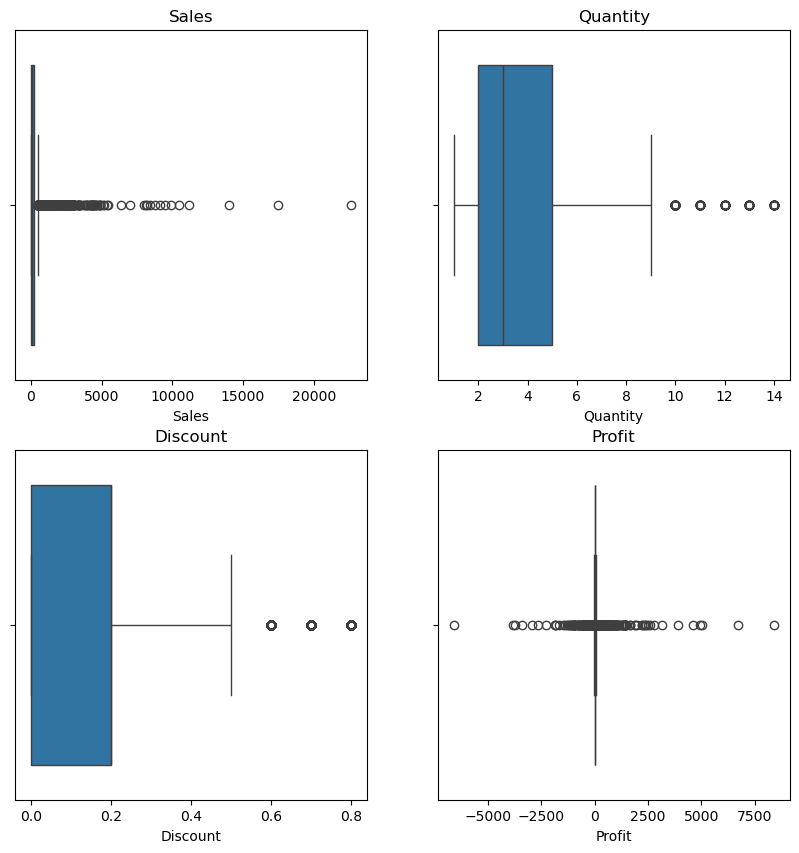

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot for Sales
sns.boxplot(x=df["Sales"], ax=axes[0, 0])
axes[0, 0].set_title("Sales")

# Boxplot for Quantity
sns.boxplot(x=df["Quantity"], ax=axes[0, 1])
axes[0, 1].set_title("Quantity")

# Boxplot for Discount
sns.boxplot(x=df["Discount"], ax=axes[1, 0])
axes[1, 0].set_title("Discount")

# Boxplot for Profit
sns.boxplot(x=df["Profit"], ax=axes[1, 1])
axes[1, 1].set_title("Profit")


plt.show()

**2.3.2 Data Distribution**

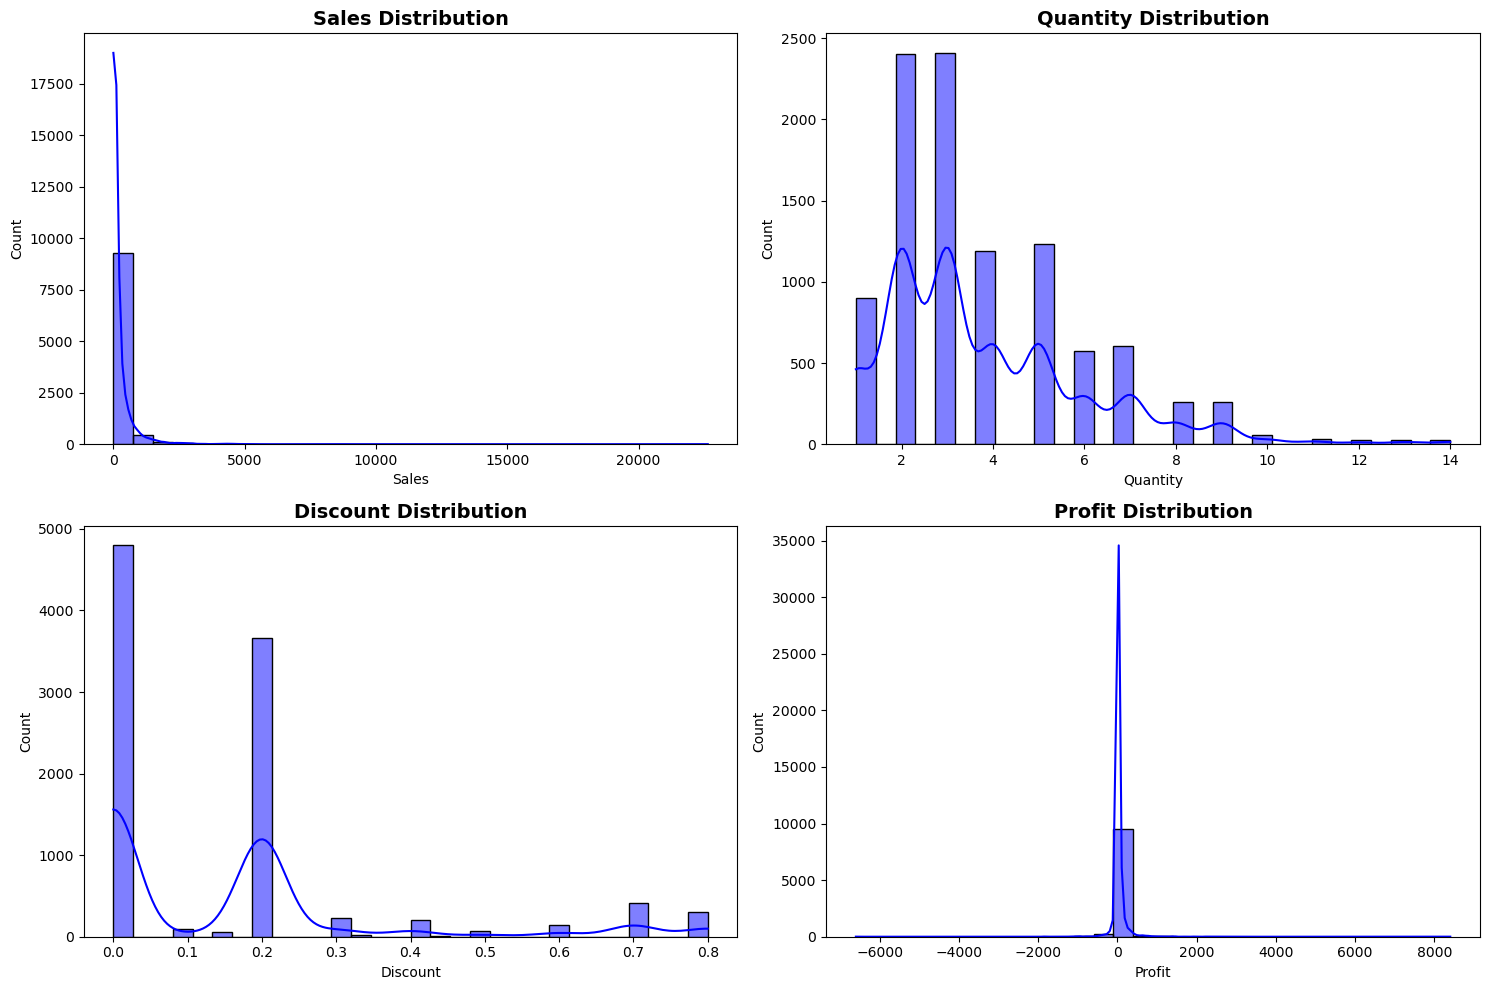

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

**Normal Test**

In [ ]:

import scipy.stats as stats


numerical_columns = ['Sales', 'Discount', 'Quantity', 'Profit']

normaltest_results = {}
for column in numerical_columns:
    stat, p_value = stats.normaltest(df[column])
    normaltest_results[column] = {'statistic': stat, 'p_value': p_value}

for column, result in normaltest_results.items():
    print(f"Column: {column}, Statistic: {result['statistic']:.2f}, P-Value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"The data in the {column} column is not normally distributed.")
    else:
        print(f"The data in the {column} column is normally distributed.")

Column: Sales, Statistic: 18031.09, P-Value: 0.0000
The data in the Sales column is not normally distributed.
Column: Discount, Statistic: 2978.01, P-Value: 0.0000
The data in the Discount column is not normally distributed.
Column: Quantity, Statistic: 2147.49, P-Value: 0.0000
The data in the Quantity column is not normally distributed.
Column: Profit, Statistic: 14361.91, P-Value: 0.0000
The data in the Profit column is not normally distributed.


## **3. Exploratory Data Analysis**

### **Rata sales per Customer**

In [137]:
sales_per_order = df.groupby(['Customer', 'Order ID'])['Sales'].sum().reset_index()
avg_sales_per_customer = sales_per_order.groupby('Customer')['Sales'].mean().reset_index()

avg_sales_per_customer

,Customer,Sales
0,AT&T,439.736179
1,Abbott Laboratories,407.003677
2,Aetna,358.928855
3,Airbus,513.768845
4,Allianz,420.629088
...,...,...
94,Volkswagen,541.544985
95,Walgreens,436.988455
96,Walmart,467.569109
97,Walt Disney,556.283113


In [138]:

sales_per_order = df.groupby(['Customer', 'Order ID'])['Sales'].sum().reset_index()

# Hitung Rata-rata penjualan per transaksi
avg_sales = (
    sales_per_order.groupby('Customer')['Sales']
    .mean()
    .reset_index(name='Avg Sales per Transaction')
)

# Hitung jumlah Transaksi Per Customer
transaction_count = (
    sales_per_order.groupby('Customer')['Order ID']
    .count()
    .reset_index(name='Frequency')
)

customer_stats = (
    avg_sales
    .merge(transaction_count, on='Customer', how='left'))


customer_stats

,Customer,Avg Sales per Transaction,Frequency
0,AT&T,439.736179,67
1,Abbott Laboratories,407.003677,31
2,Aetna,358.928855,76
3,Airbus,513.768845,58
4,Allianz,420.629088,102
...,...,...,...
94,Volkswagen,541.544985,65
95,Walgreens,436.988455,33
96,Walmart,467.569109,46
97,Walt Disney,556.283113,53


### **Durasi Customer**

In [139]:
#Menententukan tanggal analisis
analysis_date = df["Order Date"].max() + pd.Timedelta(days=1)


# Fungsi hitung First Order
def get_first_order(customer_date):
    return customer_date.min()
First_Order = (
    df.groupby("Customer")["Order Date"]
    .apply(get_first_order)
    .reset_index(name="First Order")
)

# Fungsi hitung Last Order
def get_last_order(customer_date):
    return customer_date.max()
Last_Order = (
    df.groupby("Customer")["Order Date"]
    .apply(get_last_order)
    .reset_index(name="Last Order"))

customer_duration = (
    First_Order
    .merge(Last_Order, on="Customer"))

# Hitung Recency
def get_customer_recency(customer_date):
    day_diff = (analysis_date - customer_date.max()).days
    return day_diff

Recency = (
    df.groupby("Customer")["Order Date"]
    .apply(get_customer_recency)
    .reset_index(name="Recency")
)

# Hitung lama menjadi Customer(lenght)
def get_customer_duration(row):
    return (row["Last Order"] - row["First Order"]).days

customer_duration["Customer Duration Days"] = customer_duration.apply(get_customer_duration, axis=1)

# Hitung rata-rata  durasi antar transaksi per customer
def get_avg_days_between(customer_dates):
    sorted_dates = customer_dates.sort_values()
    diffs = sorted_dates.diff().dt.days
    return diffs.mean()

avg_days_between = (
    df.groupby("Customer")["Order Date"]
    .apply(get_avg_days_between)
    .reset_index(name="Avg Days Between order")
)

customer_duration = customer_duration.merge(avg_days_between, on="Customer", how="left").merge(Recency, on="Customer")
customer_duration


,Customer,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency
0,AT&T,2020-03-11,2023-12-22,1381,9.206667,10
1,Abbott Laboratories,2020-04-15,2023-12-19,1343,20.348485,13
2,Aetna,2020-03-31,2023-12-10,1349,8.875000,22
3,Airbus,2020-01-11,2023-12-04,1423,11.663934,28
4,Allianz,2020-03-17,2023-12-30,1383,7.240838,2
...,...,...,...,...,...,...
94,Volkswagen,2020-02-07,2023-12-10,1402,10.541353,22
95,Walgreens,2020-02-12,2023-12-17,1404,20.955224,15
96,Walmart,2020-03-04,2023-12-11,1377,12.078947,21
97,Walt Disney,2020-04-02,2023-12-09,1346,13.196078,23


### **Product yang Paling Sering dibeli per Customer**

In [140]:

purchace_counts = (
    df.groupby(['Customer', 'Product'])
      .size()
      .reset_index(name='Purchase Count')
)


product_counts = (
    df.groupby(['Customer', 'Product'])['Quantity']
      .sum()
      .reset_index(name='Total Quantity')
)


product_stats = pd.merge(
    purchace_counts, 
    product_counts, 
    on=['Customer', 'Product'], 
    how='inner'
)

most_bought_product = (
    product_stats.loc[
        product_stats.groupby('Customer')['Purchase Count'].idxmax()
    ]
    .reset_index(drop=True)
)


most_bought_product.sort_values('Purchase Count', ascending=False)

,Customer,Product,Purchase Count,Total Quantity
38,Ford Motor,ContactMatcher,39,133
4,Allianz,ContactMatcher,37,131
2,Aetna,ContactMatcher,35,110
80,Siemens,ContactMatcher,35,138
89,Tyson Foods,ContactMatcher,33,138
...,...,...,...,...
78,Safeway,ContactMatcher,8,32
39,Gazprom,ContactMatcher,8,26
6,Alphabet,ContactMatcher,8,30
27,Citigroup,ContactMatcher,6,21


In [141]:
product_sales = (
    df.groupby('Product')[['Quantity']]
    .sum()
    .reset_index()
    .sort_values('Quantity', ascending=False)
)
product_sales

,Product,Quantity
3,ContactMatcher,7215
13,Support,5825
5,FinanceHub,3754
9,SaaS Connector Pack,3563
11,Site Analytics,3289
7,Marketing Suite - Gold,3158
2,ChatBot Plugin,3000
4,Data Smasher,2976
8,OneView,1729
12,Storage,914


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\3765433376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


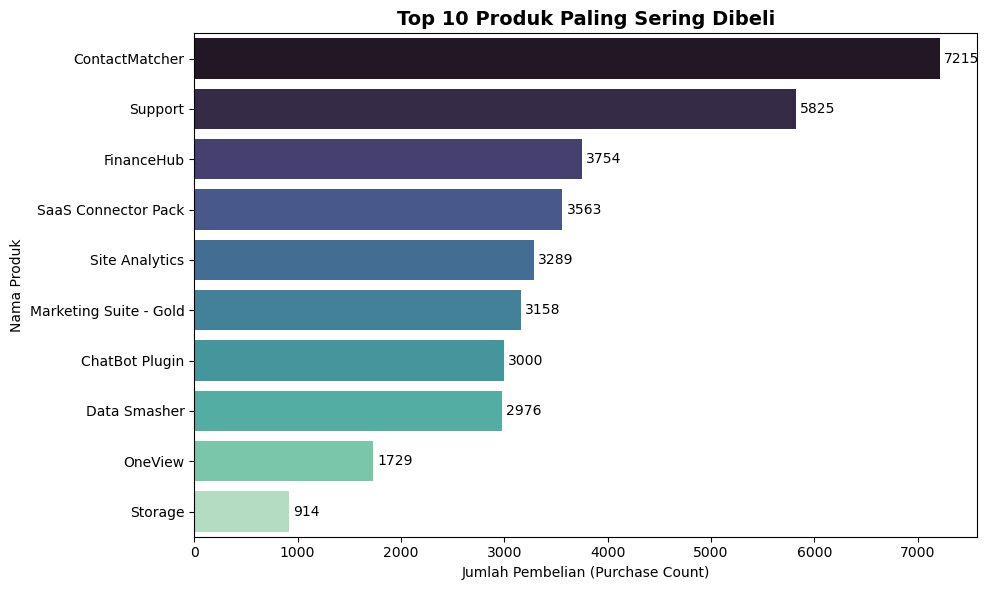

In [142]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=product_sales.head(10),
    x='Quantity',
    y='Product',
    palette='mako'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Top 10 Produk Paling Sering Dibeli', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pembelian (Purchase Count)')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()


Product yang paling laku adalah **ContactMatcher**

### **Total Profit**

In [143]:

print(f'''Total profit: {df['Profit'].sum()}
Profit tertinggi: {df['Profit'].max()}
Profit terendah: {df['Profit'].min()}''')

Total profit: 286409.0805
Profit tertinggi: 8399.976
Profit terendah: -6599.978


### **Customer  Yang Paling Profit**

In [144]:
# Hitung total profit per customer
customer_profit = (
    df.groupby('Customer')['Profit']
      .sum()
      .reset_index(name='Total Profit')
      .sort_values(by='Total Profit', ascending=False)
)

# Tampilkan customer dengan profit paling tinggi
customer_profit


,Customer,Total Profit
92,Valero Energy,10308.6297
28,Coca-Cola,9449.0246
88,Trafigura Group,8867.8252
62,Mondelez International,8577.6524
55,Lowes,7937.4915
...,...,...
95,Walgreens,-740.6747
31,Costco Wholesale,-1354.8547
66,Nissan Motor,-1585.1886
19,Bosch,-1823.7794


Customer yang paling  memberikan profit adalah Valero Energy dengan profit $10308

In [145]:
customerinfo = customer_profit.merge(
    df.groupby('Customer')
      .agg({
          'Industry': 'first',
          'Segment': 'first',
          'Country': 'first',
          'Region': 'first'
      })
      .reset_index(),
    on='Customer',
    how='left',
    
)
customerinfo

,Customer,Total Profit,Industry,Segment,Country,Region
0,Valero Energy,10308.6297,Energy,SMB,United States,AMER
1,Coca-Cola,9449.0246,Consumer Products,SMB,Japan,APJ
2,Trafigura Group,8867.8252,Finance,SMB,Luxembourg,EMEA
3,Mondelez International,8577.6524,Consumer Products,SMB,United States,AMER
4,Lowes,7937.4915,Retail,SMB,Australia,APJ
...,...,...,...,...,...,...
94,Walgreens,-740.6747,Retail,Enterprise,Belgium,EMEA
95,Costco Wholesale,-1354.8547,Retail,SMB,France,EMEA
96,Nissan Motor,-1585.1886,Transportation,Strategic,Japan,APJ
97,Bosch,-1823.7794,Tech,SMB,Spain,EMEA


In [146]:

# Hitung total profit, total sales, dan rasio profit per product
product_stats = (
    df.groupby('Product')[['Sales', 'Profit']]
      .sum()
      .reset_index()
)

product_stats['Profit Ratio'] = product_stats['Profit'] / product_stats['Sales']
product_stats.sort_values('Sales',ascending=False)

,Product,Sales,Profit,Profit Ratio
3,ContactMatcher,410378.2650,12496.2822,0.030451
5,FinanceHub,340654.0430,32148.4791,0.094373
11,Site Analytics,330007.0540,44515.7306,0.134893
7,Marketing Suite - Gold,223843.6080,21278.8264,0.095061
1,Big Ol Database,189238.6310,3384.7569,0.017886
4,Data Smasher,167380.3180,41936.6357,0.250547
0,Alchemy,149528.0300,55617.8249,0.371956
13,Support,125152.7440,32864.4698,0.262595
6,Marketing Suite,114879.9963,-3472.5560,-0.030228
8,OneView,107532.1610,18138.0054,0.168675


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\3125373952.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit, x='Product', y='Profit', palette='YlGnBu', ax=axes[0,0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\3125373952.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales, x='Product', y='Sales', palette='BuPu', ax=axes[0,1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\3125373952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ratio, x='Product', y='Profit Ratio', palette='OrRd'

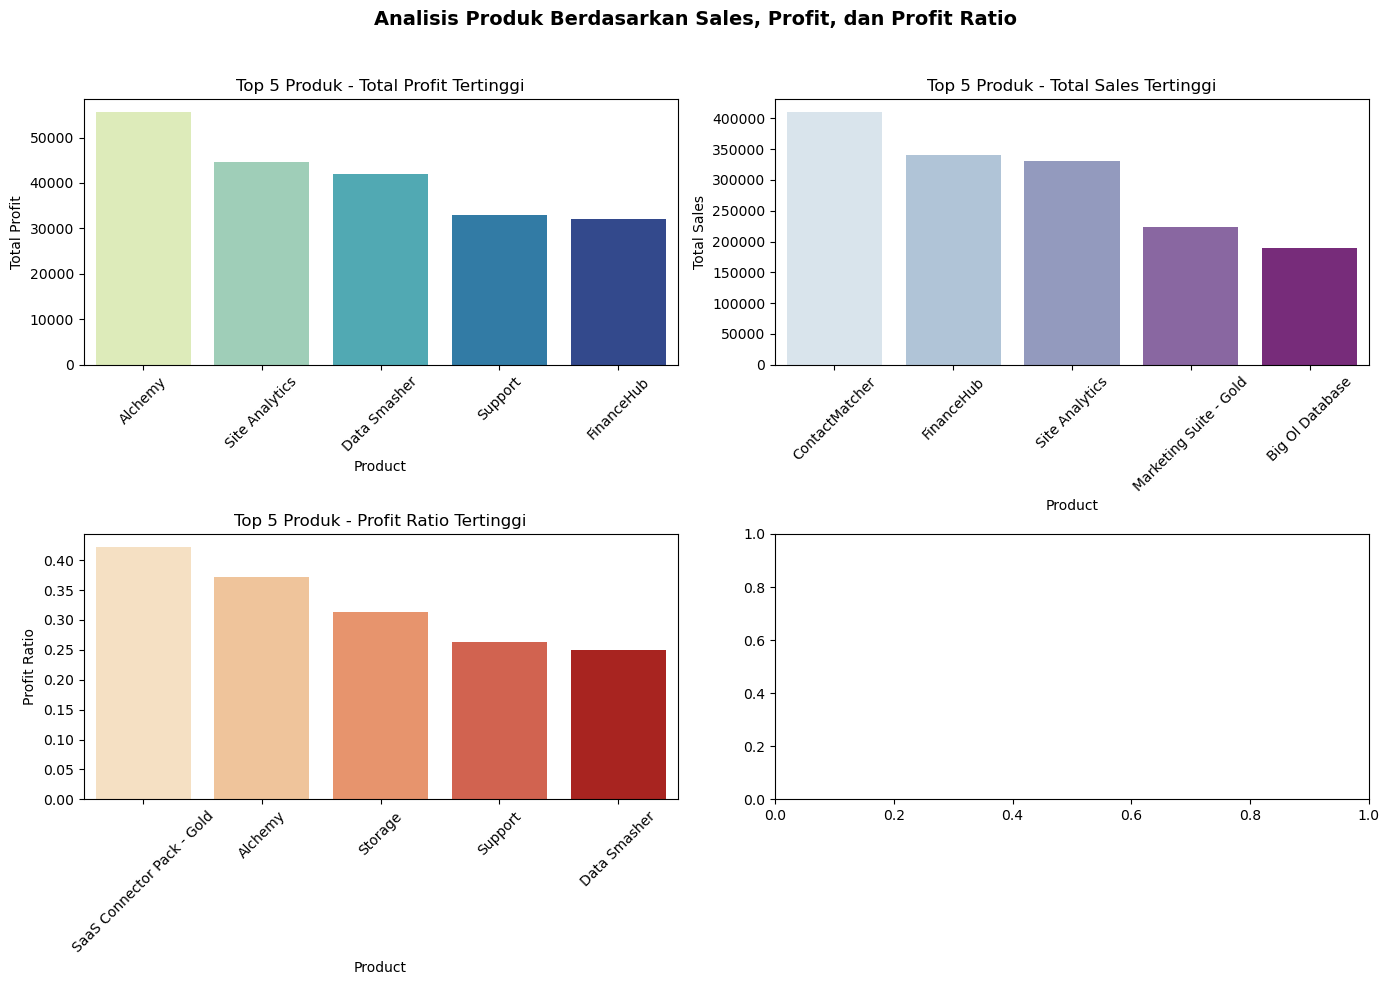

In [147]:
top_profit = product_stats.sort_values('Profit', ascending=False).head(5)
top_sales = product_stats.sort_values('Sales', ascending=False).head(5)
top_ratio = product_stats.sort_values('Profit Ratio', ascending=False).head(5)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


sns.barplot(data=top_profit, x='Product', y='Profit', palette='YlGnBu', ax=axes[0,0])
axes[0,0].set_title('Top 5 Produk - Total Profit Tertinggi')
axes[0,0].set_xlabel('Product')
axes[0,0].set_ylabel('Total Profit')
axes[0,0].tick_params(axis='x', rotation=45)

sns.barplot(data=top_sales, x='Product', y='Sales', palette='BuPu', ax=axes[0,1])
axes[0,1].set_title('Top 5 Produk - Total Sales Tertinggi')
axes[0,1].set_xlabel('Product')
axes[0,1].set_ylabel('Total Sales')
axes[0,1].tick_params(axis='x', rotation=45)


sns.barplot(data=top_ratio, x='Product', y='Profit Ratio', palette='OrRd', ax=axes[1,0])
axes[1,0].set_title('Top 5 Produk - Profit Ratio Tertinggi')
axes[1,0].set_xlabel('Product')
axes[1,0].set_ylabel('Profit Ratio')
axes[1,0].tick_params(axis='x', rotation=45)

plt.suptitle('Analisis Produk Berdasarkan Sales, Profit, dan Profit Ratio', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- Produk dengan **Sales** Tertinggi adalah **ContactMatcher**
- Produk dengan **Profit** Tertinggi adalah **Alchemy**
- Produk dengan **Profit Ratio** Tertinggi adalah **SaaS Connector Pack - Gold**, di posisi kedua adalah **Alchemy**
- dengan kata lain Produk yang paling menguntungkan adalah **Alchemy**

## **4. Analisis Data**
### **4.1 Analisis Nilai CLV (Customer Lifetime Value)**

In [148]:
# Analisis nilai CLV menggunakan data yang telah diolah sebelumnya
Nilai_CLV= pd.merge(customer_stats, customer_duration, on='Customer')
Nilai_CLV

,Customer,Avg Sales per Transaction,Frequency,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency
0,AT&T,439.736179,67,2020-03-11,2023-12-22,1381,9.206667,10
1,Abbott Laboratories,407.003677,31,2020-04-15,2023-12-19,1343,20.348485,13
2,Aetna,358.928855,76,2020-03-31,2023-12-10,1349,8.875000,22
3,Airbus,513.768845,58,2020-01-11,2023-12-04,1423,11.663934,28
4,Allianz,420.629088,102,2020-03-17,2023-12-30,1383,7.240838,2
...,...,...,...,...,...,...,...,...
94,Volkswagen,541.544985,65,2020-02-07,2023-12-10,1402,10.541353,22
95,Walgreens,436.988455,33,2020-02-12,2023-12-17,1404,20.955224,15
96,Walmart,467.569109,46,2020-03-04,2023-12-11,1377,12.078947,21
97,Walt Disney,556.283113,53,2020-04-02,2023-12-09,1346,13.196078,23


In [149]:
Nilai_CLV["CLV Score"] = ((Nilai_CLV['Avg Sales per Transaction']* Nilai_CLV["Frequency"] * Nilai_CLV["Customer Duration Days"])/10e3).round()
Nilai_CLV.sort_values('CLV Score', ascending=False)

,Customer,Avg Sales per Transaction,Frequency,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency,CLV Score
10,Anthem,960.676034,58,2020-01-14,2023-12-24,1440,10.827068,8,8024.0
38,Ford Motor,426.146043,103,2020-03-03,2023-12-25,1392,7.954286,7,6110.0
4,Allianz,420.629088,102,2020-03-17,2023-12-30,1383,7.240838,2,5934.0
55,Lowes,695.864879,58,2020-01-21,2023-12-24,1433,13.146789,8,5784.0
92,Valero Energy,710.696876,58,2020-03-18,2023-12-16,1368,13.153846,16,5639.0
...,...,...,...,...,...,...,...,...,...
86,Tesco,340.551083,24,2020-08-05,2023-11-26,1208,25.702128,36,987.0
17,Berkshire Hathaway,284.037160,25,2020-03-31,2023-12-27,1366,35.947368,5,970.0
78,Safeway,331.656850,20,2020-05-30,2023-10-16,1234,32.473684,77,819.0
27,Citigroup,471.732385,13,2020-04-25,2023-05-06,1106,52.666667,240,678.0


Hasil analisis menunjukan bahwa **Skor CLV** paling tinggi dimiliki olej **Anthem** dengan Skor 8024

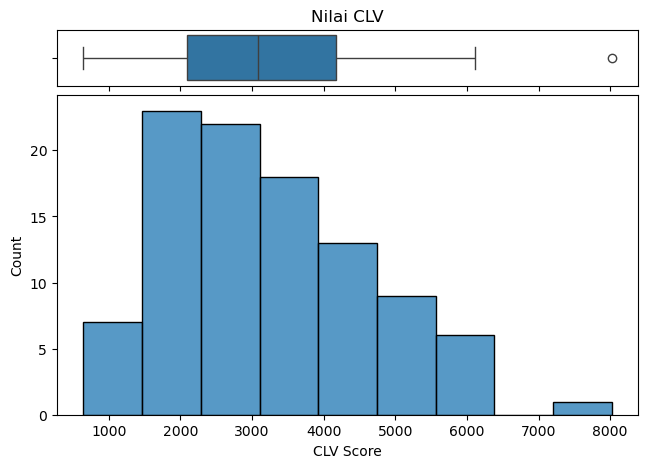

In [150]:
# Segmentasi skor CLV
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=Nilai_CLV, x='CLV Score', ax=ax_top)
sns.histplot(data=Nilai_CLV, x='CLV Score', ax=ax_bot)

ax_top.set(
    title='Nilai CLV'
)

plt.show()

In [151]:
Nilai_CLV["CLV Score"].quantile([0,.25,.50,.75,1])

0.00     647.0
0.25    2090.0
0.50    3082.0
0.75    4170.5
1.00    8024.0
Name: CLV Score, dtype: float64

CLV Score bisa dikelompokkan jadi 3, yaitu:

- **3 (High Value)**: > 4170

- **2 (Medium Value)**: 2090<=>3082

- **1 (Low Value)**: < 2090



In [152]:
def clv_class(clv):
    if clv <= 2090:
        return 'Low Value'
    elif clv <= 3082:
        return 'Medium Value'
    else:
        return 'High Value'

Nilai_CLV['CLV Class'] = Nilai_CLV["CLV Score"].apply(clv_class)
Nilai_CLV

,Customer,Avg Sales per Transaction,Frequency,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency,CLV Score,CLV Class
0,AT&T,439.736179,67,2020-03-11,2023-12-22,1381,9.206667,10,4069.0,High Value
1,Abbott Laboratories,407.003677,31,2020-04-15,2023-12-19,1343,20.348485,13,1694.0,Low Value
2,Aetna,358.928855,76,2020-03-31,2023-12-10,1349,8.875000,22,3680.0,High Value
3,Airbus,513.768845,58,2020-01-11,2023-12-04,1423,11.663934,28,4240.0,High Value
4,Allianz,420.629088,102,2020-03-17,2023-12-30,1383,7.240838,2,5934.0,High Value
...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,541.544985,65,2020-02-07,2023-12-10,1402,10.541353,22,4935.0,High Value
95,Walgreens,436.988455,33,2020-02-12,2023-12-17,1404,20.955224,15,2025.0,Low Value
96,Walmart,467.569109,46,2020-03-04,2023-12-11,1377,12.078947,21,2962.0,Medium Value
97,Walt Disney,556.283113,53,2020-04-02,2023-12-09,1346,13.196078,23,3968.0,High Value


In [153]:
Nilai_CLV['CLV Class'].value_counts()

CLV Class
High Value      49
Low Value       25
Medium Value    25
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\2779244649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Nilai_CLV, x='CLV Class', palette='Set2')


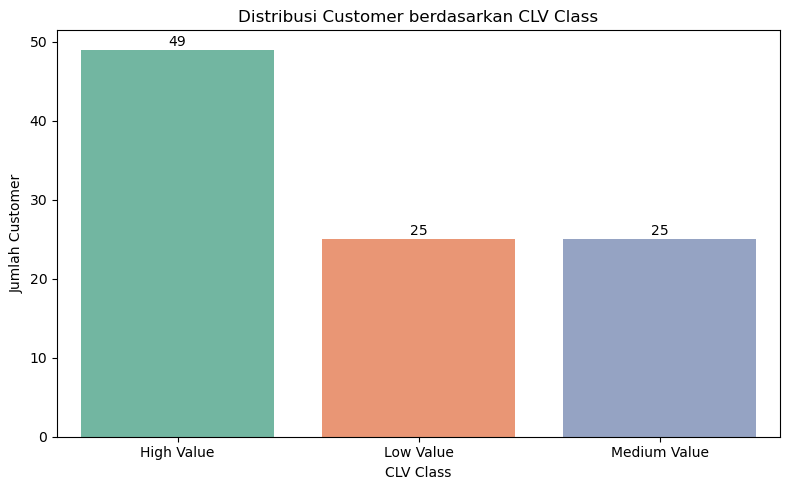

In [154]:
# Distribusi Customer Berdasarkan kelas CLV
plt.figure(figsize=(8,5))
sns.countplot(data=Nilai_CLV, x='CLV Class', palette='Set2')

plt.title('Distribusi Customer berdasarkan CLV Class')
plt.xlabel('CLV Class')
plt.ylabel('Jumlah Customer')

for i, count in enumerate(Nilai_CLV['CLV Class'].value_counts().sort_index()):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()


Dari 99 Customer terdapat:
- 49 Customer dengan kategori High Value
- 25 Customer dengan kategori Medium Value
- 25 Customer dengan kategori Low Value


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\1220798628.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


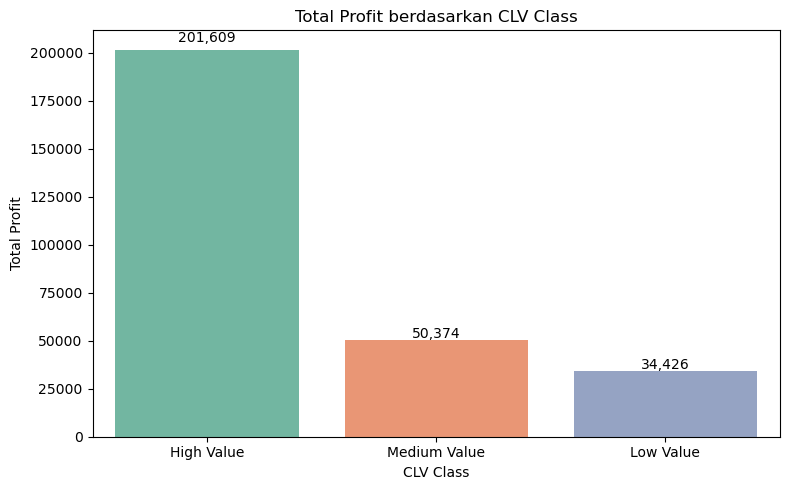

In [155]:
#Hitung nilai profit per kelas CLV
Nilai_CLV = Nilai_CLV.merge(
    customer_profit[["Customer", "Total Profit"]],
    on="Customer",
    how="left")

profit_per_clv = (
    Nilai_CLV.groupby('CLV Class')['Total Profit']
    .sum()
    .reset_index()
    .sort_values('Total Profit', ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(
    data=profit_per_clv,
    x='CLV Class',
    y='Total Profit',
    palette='Set2'
)

plt.title('Total Profit berdasarkan CLV Class')
plt.xlabel('CLV Class')
plt.ylabel('Total Profit')

for i, v in enumerate(profit_per_clv['Total Profit']):
    plt.text(i, v + (v * 0.02), f"{v:,.0f}", ha='center')

plt.tight_layout()
plt.show()



Profit yang dihasilkan dari Customer dengan Kategori High value merupakan paling tinggi dan terlampau sangat jauh daripada kategori lainnya.

In [156]:
Nilai_CLV

,Customer,Avg Sales per Transaction,Frequency,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency,CLV Score,CLV Class,Total Profit
0,AT&T,439.736179,67,2020-03-11,2023-12-22,1381,9.206667,10,4069.0,High Value,4520.6641
1,Abbott Laboratories,407.003677,31,2020-04-15,2023-12-19,1343,20.348485,13,1694.0,Low Value,2281.7391
2,Aetna,358.928855,76,2020-03-31,2023-12-10,1349,8.875000,22,3680.0,High Value,3312.6698
3,Airbus,513.768845,58,2020-01-11,2023-12-04,1423,11.663934,28,4240.0,High Value,5593.3657
4,Allianz,420.629088,102,2020-03-17,2023-12-30,1383,7.240838,2,5934.0,High Value,5531.8834
...,...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,541.544985,65,2020-02-07,2023-12-10,1402,10.541353,22,4935.0,High Value,4546.1910
95,Walgreens,436.988455,33,2020-02-12,2023-12-17,1404,20.955224,15,2025.0,Low Value,-740.6747
96,Walmart,467.569109,46,2020-03-04,2023-12-11,1377,12.078947,21,2962.0,Medium Value,3111.1277
97,Walt Disney,556.283113,53,2020-04-02,2023-12-09,1346,13.196078,23,3968.0,High Value,5786.8297


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\2769960821.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='CLV Class')


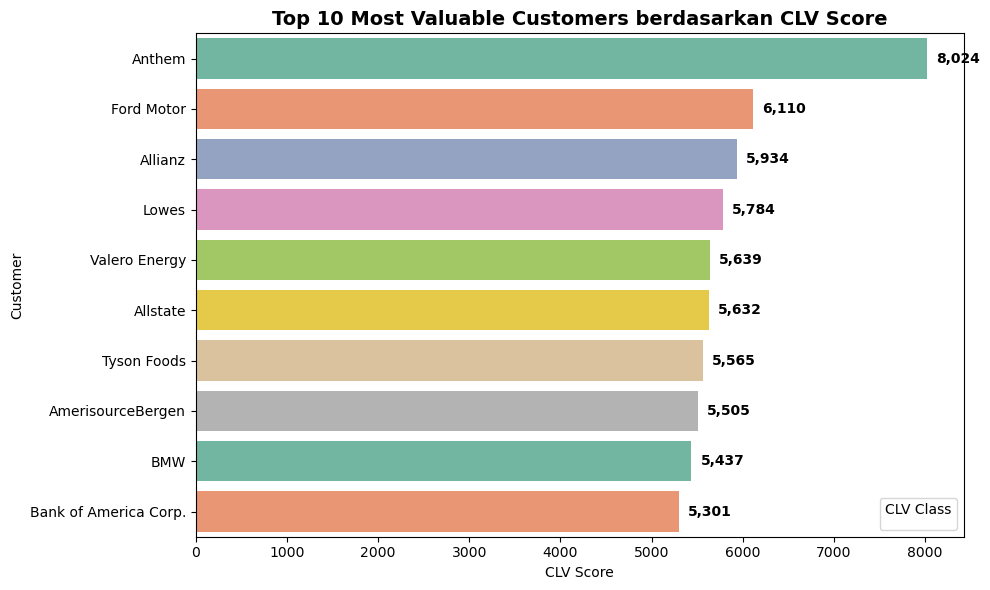

In [157]:
top10_clv = (
    Nilai_CLV[['Customer', 'CLV Score', 'CLV Class']]
    .sort_values(by='CLV Score', ascending=False)
    .head(10) )

plt.figure(figsize=(10,6))

# Plot bar chart
ax = sns.barplot(
    data=top10_clv,
    x='CLV Score',
    y='Customer',
    hue='Customer',
    palette='Set2',
    dodge=False
)


for p in ax.patches:
    width = p.get_width()      
    y = p.get_y() + p.get_height() / 2 
    ax.text(
        width + 100,           
        y,
        f'{width:,.0f}',        
        va='center',
        ha='left',
        fontsize=10,
        color='black',
        fontweight='bold'
    )


plt.title('Top 10 Most Valuable Customers berdasarkan CLV Score', fontsize=14, fontweight='bold')
plt.xlabel('CLV Score')
plt.ylabel('Customer')
plt.legend(title='CLV Class')
plt.tight_layout()
plt.show()


In [158]:
Nilai_CLV = Nilai_CLV .merge(customerinfo[['Customer', 'Region', 'Industry', 'Segment']],
    on='Customer',
    how='left' )

Nilai_CLV= Nilai_CLV. merge(most_bought_product[["Customer", "Product"]],
                            on='Customer', how='left').rename(columns={"Product":"Top Product"})

Nilai_CLV

,Customer,Avg Sales per Transaction,Frequency,First Order,Last Order,Customer Duration Days,Avg Days Between order,Recency,CLV Score,CLV Class,Total Profit,Region,Industry,Segment,Top Product
0,AT&T,439.736179,67,2020-03-11,2023-12-22,1381,9.206667,10,4069.0,High Value,4520.6641,AMER,Communications,Enterprise,Support
1,Abbott Laboratories,407.003677,31,2020-04-15,2023-12-19,1343,20.348485,13,1694.0,Low Value,2281.7391,APJ,Healthcare,Enterprise,ContactMatcher
2,Aetna,358.928855,76,2020-03-31,2023-12-10,1349,8.875000,22,3680.0,High Value,3312.6698,EMEA,Healthcare,SMB,ContactMatcher
3,Airbus,513.768845,58,2020-01-11,2023-12-04,1423,11.663934,28,4240.0,High Value,5593.3657,EMEA,Manufacturing,Enterprise,Support
4,Allianz,420.629088,102,2020-03-17,2023-12-30,1383,7.240838,2,5934.0,High Value,5531.8834,AMER,Finance,SMB,ContactMatcher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,541.544985,65,2020-02-07,2023-12-10,1402,10.541353,22,4935.0,High Value,4546.1910,AMER,Manufacturing,SMB,Support
95,Walgreens,436.988455,33,2020-02-12,2023-12-17,1404,20.955224,15,2025.0,Low Value,-740.6747,EMEA,Retail,Enterprise,ContactMatcher
96,Walmart,467.569109,46,2020-03-04,2023-12-11,1377,12.078947,21,2962.0,Medium Value,3111.1277,EMEA,Retail,SMB,ContactMatcher
97,Walt Disney,556.283113,53,2020-04-02,2023-12-09,1346,13.196078,23,3968.0,High Value,5786.8297,EMEA,Communications,Enterprise,ContactMatcher


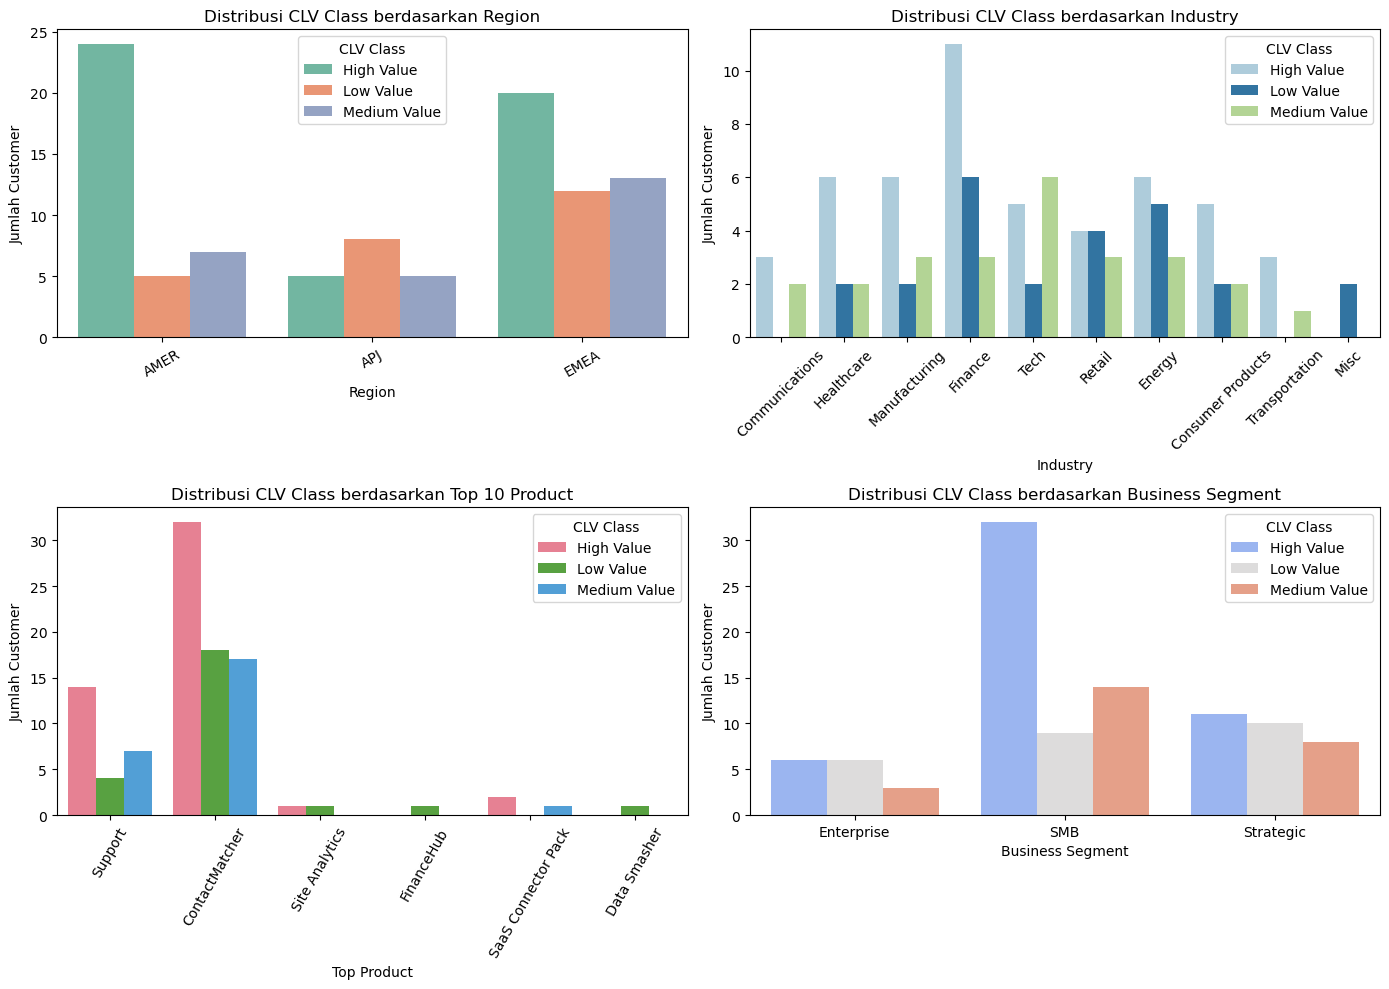

In [159]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data=Nilai_CLV, x='Region', hue='CLV Class', palette='Set2')
plt.title('Distribusi CLV Class berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Jumlah Customer')
plt.legend(title='CLV Class')
plt.xticks(rotation=30)

plt.subplot(2,2,2)
sns.countplot(data=Nilai_CLV, x='Industry', hue='CLV Class', palette='Paired')
plt.title('Distribusi CLV Class berdasarkan Industry')
plt.xlabel('Industry')
plt.ylabel('Jumlah Customer')
plt.legend(title='CLV Class')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
top_products = (Nilai_CLV['Top Product']
                .value_counts()
                .head(10)
                .index)
sns.countplot(data=Nilai_CLV[Nilai_CLV['Top Product'].isin(top_products)],
              x='Top Product', hue='CLV Class', palette='husl')
plt.title('Distribusi CLV Class berdasarkan Top 10 Product')
plt.xlabel('Top Product')
plt.ylabel('Jumlah Customer')
plt.legend(title='CLV Class')
plt.xticks(rotation=60)

plt.subplot(2,2,4)
sns.countplot(data=Nilai_CLV, x='Segment', hue='CLV Class', palette='coolwarm')
plt.title('Distribusi CLV Class berdasarkan Business Segment')
plt.xlabel('Business Segment')
plt.ylabel('Jumlah Customer')
plt.legend(title='CLV Class')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### **4.2 Analisis LRFM (Lenght, Recency, Frequency, Monetary)**


In [160]:
#Recency
Recency = customer_duration[["Customer","Recency"]]
Recency


,Customer,Recency
0,AT&T,10
1,Abbott Laboratories,13
2,Aetna,22
3,Airbus,28
4,Allianz,2
...,...,...
94,Volkswagen,22
95,Walgreens,15
96,Walmart,21
97,Walt Disney,23


In [161]:
#lenght
Length = customer_duration[["Customer", "Customer Duration Days"]].rename(columns={"Customer Duration Days": "Length"})
Length

,Customer,Length
0,AT&T,1381
1,Abbott Laboratories,1343
2,Aetna,1349
3,Airbus,1423
4,Allianz,1383
...,...,...
94,Volkswagen,1402
95,Walgreens,1404
96,Walmart,1377
97,Walt Disney,1346


In [162]:
#Frequency
Frequency=df.groupby("Customer")["Order ID"].nunique().reset_index(name='Frequency')
Frequency

,Customer,Frequency
0,AT&T,67
1,Abbott Laboratories,31
2,Aetna,76
3,Airbus,58
4,Allianz,102
...,...,...
94,Volkswagen,65
95,Walgreens,33
96,Walmart,46
97,Walt Disney,53


In [163]:
# Monetary
Monetary =df.groupby('Customer')[['Sales']].sum().reset_index().rename(columns={'Sales': 'Monetary'}).round()
Monetary

,Customer,Monetary
0,AT&T,29462.0
1,Abbott Laboratories,12617.0
2,Aetna,27279.0
3,Airbus,29799.0
4,Allianz,42904.0
...,...,...
94,Volkswagen,35200.0
95,Walgreens,14421.0
96,Walmart,21508.0
97,Walt Disney,29483.0


In [164]:
#full LRFM
dfcustomer = Recency.merge(Length, on='Customer', how='left') \
                  .merge(Frequency, on='Customer', how='left') \
                  .merge(Monetary, on='Customer', how='left')

dfcustomer

,Customer,Recency,Length,Frequency,Monetary
0,AT&T,10,1381,67,29462.0
1,Abbott Laboratories,13,1343,31,12617.0
2,Aetna,22,1349,76,27279.0
3,Airbus,28,1423,58,29799.0
4,Allianz,2,1383,102,42904.0
...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0
95,Walgreens,15,1404,33,14421.0
96,Walmart,21,1377,46,21508.0
97,Walt Disney,23,1346,53,29483.0


**Segmentasi Length**

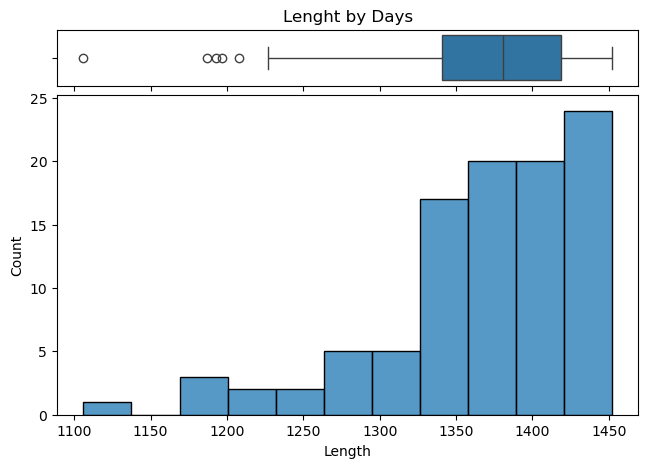

In [165]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=dfcustomer, x='Length', ax=ax_top)
sns.histplot(data=dfcustomer, x='Length', ax=ax_bot)

ax_top.set(
    title='Lenght by Days'
)

plt.show()

In [166]:
dfcustomer["Length"].quantile([0,.25,.50,.75,1])

0.00    1106.0
0.25    1341.0
0.50    1381.0
0.75    1419.0
1.00    1452.0
Name: Length, dtype: float64

Berdasarkan statistical rule, length bisa dikelompokkan jadi 4, yaitu:

- **4**: > 1419 hari

- **3**: >=1381 hari

- **2**: >= 1341 hari

- **1**: antara baru daftar dan 1341 hari 

In [167]:
#Lenght Score
def length_class(length):
    if length >= 1419:
        return 4
    elif length>= 1381:
        return 3
    elif length >= 1341:
        return 2
    else:
        return 1 

dfcustomer['Length Score'] = dfcustomer["Length"].apply(length_class)
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score
0,AT&T,10,1381,67,29462.0,3
1,Abbott Laboratories,13,1343,31,12617.0,2
2,Aetna,22,1349,76,27279.0,2
3,Airbus,28,1423,58,29799.0,4
4,Allianz,2,1383,102,42904.0,3
...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3
95,Walgreens,15,1404,33,14421.0,3
96,Walmart,21,1377,46,21508.0,2
97,Walt Disney,23,1346,53,29483.0,2


**Segmentasi Recency**

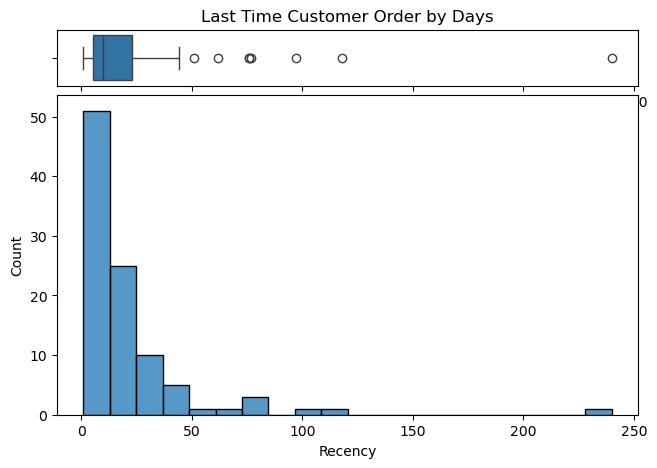

In [168]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=dfcustomer, x='Recency', ax=ax_top)
sns.histplot(data=dfcustomer, x='Recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()

In [169]:
dfcustomer["Recency"].quantile([0,.25,.50,.75,1])

0.00      1.0
0.25      5.5
0.50     10.0
0.75     23.0
1.00    240.0
Name: Recency, dtype: float64

Berdasarkan statistical rule, recency customer bisa dikelompokkan jadi 4, yaitu:

- **4 (Active)** : melakukan transaksi kurang dari 6 hari terakhir

- **3 (Warm)** : melakukan transaksi antara 6 hingga 10 hari terakhir

- **2 (Cold)** : melakukan transaksi antara 10 hingga 23 hari terakhir

- **1 (Inactive)** : melakukan transaksi lebih dari 23 hari terakhir

In [170]:
# Recency Score
def recency_class(recency):
    if recency >= 23:
        return 1
    elif recency >= 10:
        return 2
    elif recency >= 6:
        return 3
    else:
        return 4 

dfcustomer['Recency Score'] = dfcustomer["Recency"].apply(recency_class)
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score
0,AT&T,10,1381,67,29462.0,3,2
1,Abbott Laboratories,13,1343,31,12617.0,2,2
2,Aetna,22,1349,76,27279.0,2,2
3,Airbus,28,1423,58,29799.0,4,1
4,Allianz,2,1383,102,42904.0,3,4
...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2
95,Walgreens,15,1404,33,14421.0,3,2
96,Walmart,21,1377,46,21508.0,2,2
97,Walt Disney,23,1346,53,29483.0,2,1


**Segmentasi Frequency**

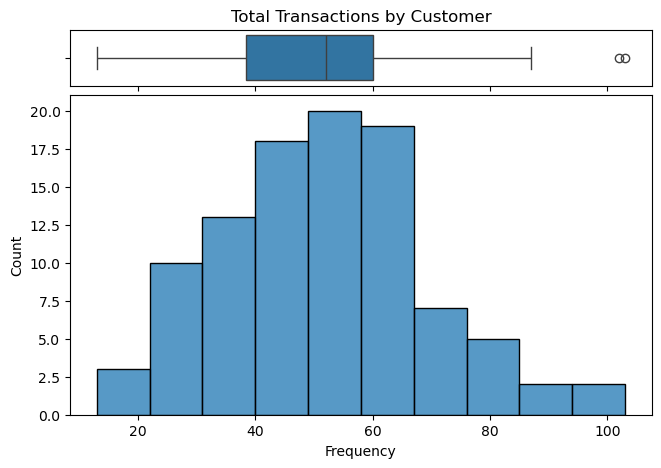

In [171]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=dfcustomer, x='Frequency', ax=ax_top)
sns.histplot(data=dfcustomer, x='Frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()

In [172]:
dfcustomer['Frequency'].quantile([0,.25,.50,.75,1])

0.00     13.0
0.25     38.5
0.50     52.0
0.75     60.0
1.00    103.0
Name: Frequency, dtype: float64

Berdasarkan domain knowledge rules, frequency customer bisa dikelompokkan jadi 4 berdasarkan jumlah transkasinya:

- **4 (Loyal)** : melakukan transaki lebih dari 60 kali

- **3 (High)**: melakukan transaksi 52 hingga 60 kali

- **2 (Medium)**: melakukan transaksi 38 hingga 52 kali

- **1 (Low)**: melakukan transaksi hanya kurang dari 38 kali.

In [173]:
# Frquency Score
def frequency_class(frequency):
    if frequency >= 60:
        return 4
    elif frequency >= 52:
        return 3
    elif frequency >= 38:
        return 2
    else:
        return 1 

dfcustomer['Frequency Score'] = dfcustomer["Frequency"].apply(frequency_class)
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score,Frequency Score
0,AT&T,10,1381,67,29462.0,3,2,4
1,Abbott Laboratories,13,1343,31,12617.0,2,2,1
2,Aetna,22,1349,76,27279.0,2,2,4
3,Airbus,28,1423,58,29799.0,4,1,3
4,Allianz,2,1383,102,42904.0,3,4,4
...,...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2,4
95,Walgreens,15,1404,33,14421.0,3,2,1
96,Walmart,21,1377,46,21508.0,2,2,2
97,Walt Disney,23,1346,53,29483.0,2,1,3


**Segmentasi Monetary**

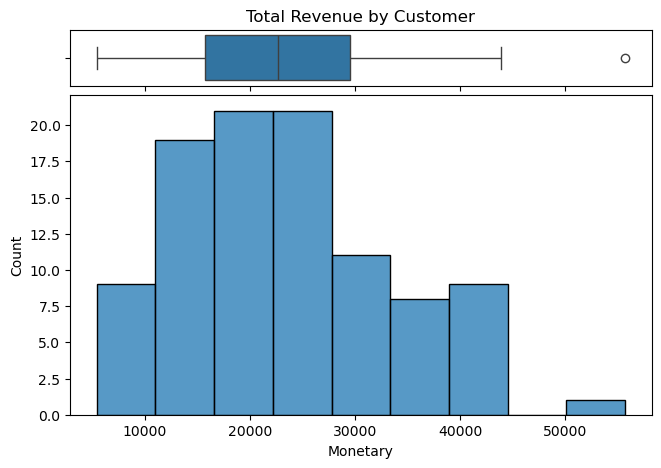

In [174]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=dfcustomer, x='Monetary', ax=ax_top)
sns.histplot(data=dfcustomer, x='Monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()

In [175]:
dfcustomer['Monetary'].quantile([0,.25,.50,.75,1]).round()

0.00     5403.0
0.25    15692.0
0.50    22651.0
0.75    29486.0
1.00    55719.0
Name: Monetary, dtype: float64

Berdasarkan statistical rule, frequency customer bisa dikelompokkan jadi 4 berdasarkan nominal transaksinya:

- **4 (Top Spender)** : melakukan transaksi lebih dari 29486 dollar

- **3 (High Spender)**: melakukan transaksi antara 22651 hingga 29486 dollar

- **2 (Medium Spender)**: melakukan transaksi antara 15693 hingga 22651 dollar

- **1 (Low Spender)**: melakukan transaksi kurang dari dari 15693 dollar

In [176]:
# Monetary Score
def monetary_class(monetary):
    if monetary >= 29486:
        return 4
    elif monetary >= 22651:
        return 3
    elif monetary >= 15693:
        return 2
    else:
        return 1 

dfcustomer['Monetary Score'] = dfcustomer["Monetary"].apply(monetary_class)
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score,Frequency Score,Monetary Score
0,AT&T,10,1381,67,29462.0,3,2,4,3
1,Abbott Laboratories,13,1343,31,12617.0,2,2,1,1
2,Aetna,22,1349,76,27279.0,2,2,4,3
3,Airbus,28,1423,58,29799.0,4,1,3,4
4,Allianz,2,1383,102,42904.0,3,4,4,4
...,...,...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2,4,4
95,Walgreens,15,1404,33,14421.0,3,2,1,1
96,Walmart,21,1377,46,21508.0,2,2,2,2
97,Walt Disney,23,1346,53,29483.0,2,1,3,3


In [177]:
dfcustomer['LRFM Score']= dfcustomer['Length Score'] + dfcustomer["Recency Score"] + dfcustomer["Frequency Score"] + dfcustomer["Monetary Score"]
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score,Frequency Score,Monetary Score,LRFM Score
0,AT&T,10,1381,67,29462.0,3,2,4,3,12
1,Abbott Laboratories,13,1343,31,12617.0,2,2,1,1,6
2,Aetna,22,1349,76,27279.0,2,2,4,3,11
3,Airbus,28,1423,58,29799.0,4,1,3,4,12
4,Allianz,2,1383,102,42904.0,3,4,4,4,15
...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2,4,4,13
95,Walgreens,15,1404,33,14421.0,3,2,1,1,7
96,Walmart,21,1377,46,21508.0,2,2,2,2,8
97,Walt Disney,23,1346,53,29483.0,2,1,3,3,9


**Segmen Label**




| Segment                      | L (Loyalty)         | R (Recency)         | F (Frequency)       | M (Monetary)        | Description                                                                         |
| ---------------------------- | ------------------- | ------------------- | ------------------- | ------------------- | ----------------------------------------------------------------------------------- |
| **Priority**                 |  ≥ 4                | ≥ 4                |  ≥ 4               |  ≥ 4              | Pelanggan terbaik dengan skor maksimal di semua aspek                                     |
| **Loyal Customer**           | ≥ 4                 | *any*               | ≥ 4                 | ≥ 4                 | Sudah lama berlangganan, sering membeli, dan memiliki nilai belanja tinggi          |
| **Big Spender**              | *any*               | *any*               | *any*               | ≥ 4                 | Sering melakukan pembelian dengan total nilai besar                                 |
| **Potential Loyalist** | *any*               | *any*               | 3–4                 | 3–4                 | Berpotensi menjadi pelanggan setia karena frekuensi dan nilai belanjanya cukup baik |
| **New Customer**             | ≤ 2                | 3-4                | ≤ 2                |*any*               | Pelanggan baru yang baru mulai aktif berbelanja                               |
| **At Risk**                 | ≥ 3                 | ≤ 2                 | ≥ 3                 | *any*               | Pernah aktif tapi kini jarang bertransaksi                                          |
| **Loyal In Budget**          | ≥ 3                 | *any*               | ≥ 3                 | ≤ 2                 | Sering berkunjung namun dengan nilai pembelian yang kecil                           |
| **Occational Customer**      | *any*               | *any*               | = 2 or M = 2        | *depends*           | Berbelanja sesekali, tidak konsisten                                                |
| **Lost / Dormant**           | *not matched above* | *not matched above* | *not matched above* | *not matched above* | Pelanggan yang sudah tidak aktif dan tidak termasuk kategori lain                   |



In [178]:
dfcustomer.isna().sum()

Customer           0
Recency            0
Length             0
Frequency          0
Monetary           0
Length Score       0
Recency Score      0
Frequency Score    0
Monetary Score     0
LRFM Score         0
dtype: int64

In [179]:
def classify_segment(row):
    L = row['Length Score'] 
    R = row['Recency Score']
    F = row['Frequency Score']
    M = row['Monetary Score']
        
    if L >= 4 and R >= 4 and F >= 4 and M >= 4:
        return "Priority"
    elif L >= 4 and F >= 4 and M >= 4:
        return "Loyal Customer"
    elif M >= 4:
        return "Big Spender"
    elif F >= 3 and M >= 3:
        return "Potential Loyalist"
    elif L <= 2 and R >= 3 and F <= 2:
        return "New Customer"
    elif L >= 3 and R <= 2 and F >= 3:
        return "At Risk"
    elif L >= 3 and F >= 3 and M <= 2:
        return "Loyal In Budget"
    elif F == 2 or M == 2:
        return "Occational Customer"
    else:
     return "Lost / Dormant"


In [180]:
dfcustomer['Cust_Segment'] = dfcustomer.apply(classify_segment, axis=1)


In [181]:
dfcustomer['Cust_Segment'].value_counts()

Cust_Segment
Occational Customer    26
Big Spender            20
Lost / Dormant         17
Potential Loyalist     16
New Customer           10
Priority                4
Loyal In Budget         3
At Risk                 2
Loyal Customer          1
Name: count, dtype: int64

In [182]:
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score,Frequency Score,Monetary Score,LRFM Score,Cust_Segment
0,AT&T,10,1381,67,29462.0,3,2,4,3,12,Potential Loyalist
1,Abbott Laboratories,13,1343,31,12617.0,2,2,1,1,6,Lost / Dormant
2,Aetna,22,1349,76,27279.0,2,2,4,3,11,Potential Loyalist
3,Airbus,28,1423,58,29799.0,4,1,3,4,12,Big Spender
4,Allianz,2,1383,102,42904.0,3,4,4,4,15,Big Spender
...,...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2,4,4,13,Big Spender
95,Walgreens,15,1404,33,14421.0,3,2,1,1,7,Lost / Dormant
96,Walmart,21,1377,46,21508.0,2,2,2,2,8,Occational Customer
97,Walt Disney,23,1346,53,29483.0,2,1,3,3,9,Potential Loyalist


In [183]:
dfcustomer['Cust_Segment'].value_counts()

Cust_Segment
Occational Customer    26
Big Spender            20
Lost / Dormant         17
Potential Loyalist     16
New Customer           10
Priority                4
Loyal In Budget         3
At Risk                 2
Loyal Customer          1
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9040\1119411128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


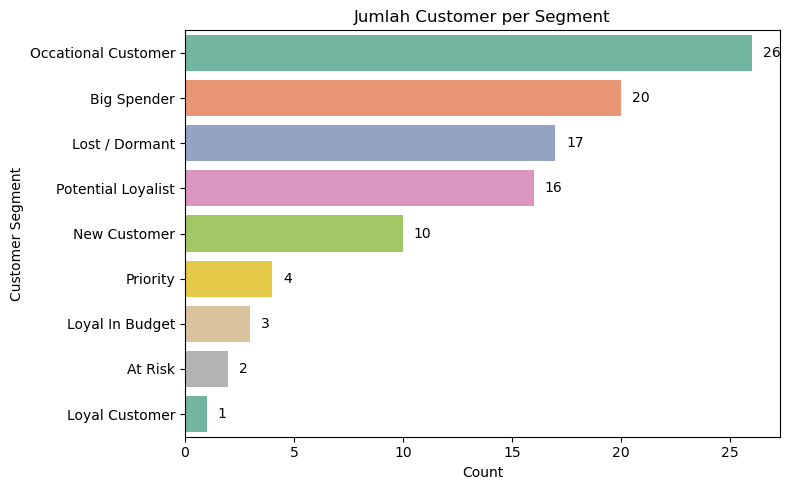

In [184]:
segment_order = dfcustomer['Cust_Segment'].value_counts().index

plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=dfcustomer,
    y='Cust_Segment',
    order=segment_order,
    palette='Set2'
)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height()/2,
        int(width),
        ha='left',
        va='center'
    )

plt.title('Jumlah Customer per Segment')
plt.xlabel('Count')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()

- Segmen paling banyak adalah **Occational Customer** dengan jumlah cutomer sebanyak 26(banyak Customer yang membeli hanya sesekali), 
- 20 Customer adalah **Big Spender** yang membeli dengan total nilai yang besar
- 17 Customer sudah tidak aktif lagi
- sedangkan **Priority** hanya ada 4

In [185]:
dfcustomer = dfcustomer.merge(customerinfo, on='Customer', how='left')

In [186]:
dfcustomer["Region"]= df["Region"]
dfcustomer= dfcustomer. merge(most_bought_product[["Customer", "Product"]],
                            on='Customer', how='left').rename(columns={"Product":"Top Product"})
dfcustomer

,Customer,Recency,Length,Frequency,Monetary,Length Score,Recency Score,Frequency Score,Monetary Score,LRFM Score,Cust_Segment,Total Profit,Industry,Segment,Country,Region,Top Product
0,AT&T,10,1381,67,29462.0,3,2,4,3,12,Potential Loyalist,4520.6641,Communications,Enterprise,United States,EMEA,Support
1,Abbott Laboratories,13,1343,31,12617.0,2,2,1,1,6,Lost / Dormant,2281.7391,Healthcare,Enterprise,Australia,EMEA,ContactMatcher
2,Aetna,22,1349,76,27279.0,2,2,4,3,11,Potential Loyalist,3312.6698,Healthcare,SMB,United Kingdom,AMER,ContactMatcher
3,Airbus,28,1423,58,29799.0,4,1,3,4,12,Big Spender,5593.3657,Manufacturing,Enterprise,Luxembourg,EMEA,Support
4,Allianz,2,1383,102,42904.0,3,4,4,4,15,Big Spender,5531.8834,Finance,SMB,United States,EMEA,ContactMatcher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,22,1402,65,35200.0,3,2,4,4,13,Big Spender,4546.1910,Manufacturing,SMB,Canada,EMEA,Support
95,Walgreens,15,1404,33,14421.0,3,2,1,1,7,Lost / Dormant,-740.6747,Retail,Enterprise,Belgium,EMEA,ContactMatcher
96,Walmart,21,1377,46,21508.0,2,2,2,2,8,Occational Customer,3111.1277,Retail,SMB,Russia,EMEA,ContactMatcher
97,Walt Disney,23,1346,53,29483.0,2,1,3,3,9,Potential Loyalist,5786.8297,Communications,Enterprise,United Kingdom,AMER,ContactMatcher


,Cust_Segment,Top Industry,Count
0,At Risk,Energy,1
1,At Risk,Finance,1
2,Big Spender,Finance,6
3,Big Spender,Manufacturing,5
4,Big Spender,Healthcare,3
5,Big Spender,Energy,3
6,Big Spender,Consumer Products,2
7,Big Spender,Retail,1
8,Lost / Dormant,Finance,4
9,Lost / Dormant,Energy,3


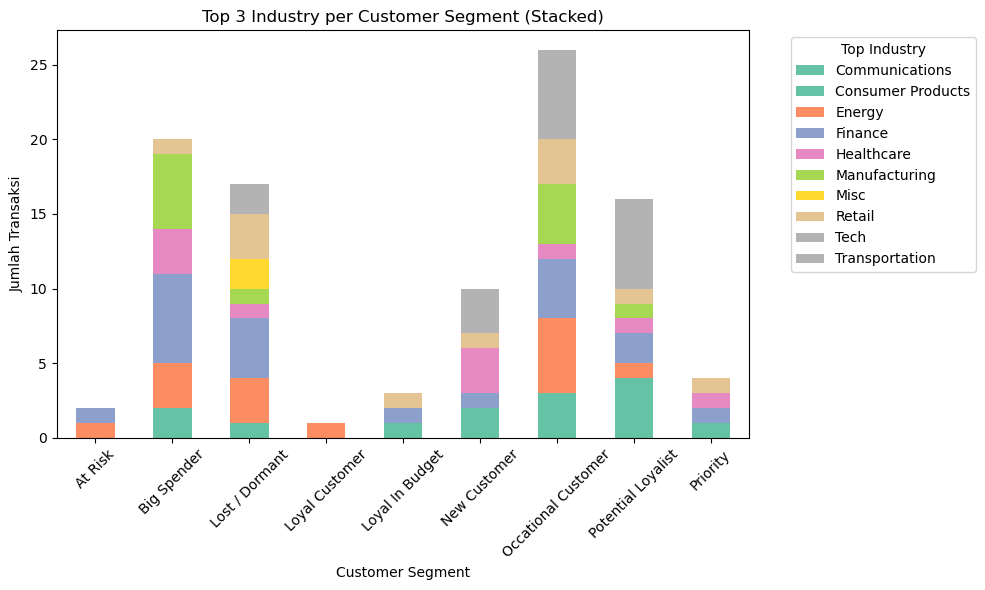

In [187]:
top3_industry = (
    dfcustomer.groupby('Cust_Segment')['Industry']
    .apply(lambda x: x.value_counts())
    .reset_index(name='Count')
    .rename(columns={
          'level_1' : 'Top Industry'})
)

pivot_industry = top3_industry.pivot(
    index='Cust_Segment',
    columns='Top Industry',
    values='Count'
).fillna(0)

pivot_industry.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set2'
)
plt.title('Top 3 Industry per Customer Segment (Stacked)')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.legend(title='Top Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

display(top3_industry)
plt.show()

,Cust_Segment,Top Product,Count
0,At Risk,Support,1
1,At Risk,ContactMatcher,1
2,Big Spender,ContactMatcher,13
3,Big Spender,Support,6
4,Big Spender,SaaS Connector Pack,1
5,Lost / Dormant,ContactMatcher,12
6,Lost / Dormant,Support,3
7,Lost / Dormant,Data Smasher,1
8,Loyal Customer,ContactMatcher,1
9,Loyal In Budget,Support,2


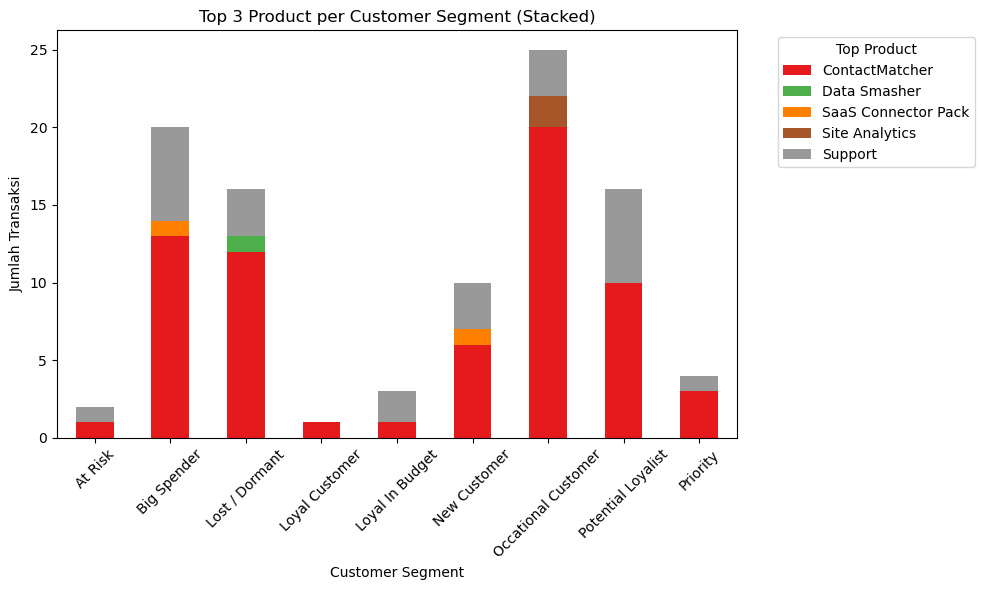

In [188]:
top3_Product = (
    dfcustomer.groupby('Cust_Segment')['Top Product']
    .apply(lambda x: x.value_counts().head(3))
    .reset_index(name='Count')
    .rename(columns={
          'level_1' : 'Top Product'})
)
pivot_Product = top3_Product.pivot(
    index='Cust_Segment',
    columns='Top Product',
    values='Count'
).fillna(0)

pivot_Product.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set1'
)
plt.title('Top 3 Product per Customer Segment (Stacked)')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.legend(title='Top Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
display(top3_Product)
plt.show()

,Cust_Segment,Top Segment,Count
0,At Risk,SMB,2
1,Big Spender,SMB,15
2,Big Spender,Strategic,3
3,Big Spender,Enterprise,2
4,Lost / Dormant,Strategic,7
5,Lost / Dormant,Enterprise,5
6,Lost / Dormant,SMB,5
7,Loyal Customer,SMB,1
8,Loyal In Budget,Strategic,2
9,Loyal In Budget,Enterprise,1


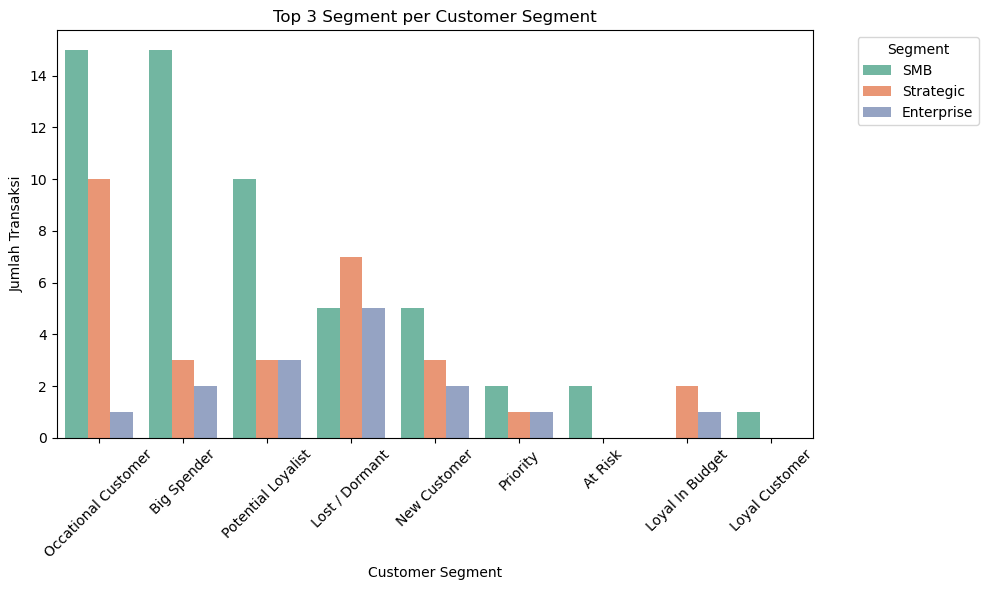

In [189]:
top3_Segment = (
    dfcustomer.groupby('Cust_Segment')['Segment']
    .apply(lambda x: x.value_counts().head(3))
    .reset_index(name='Count')
    .rename(columns={
          'level_1' : 'Top Segment'})
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top3_Segment.sort_values('Count', ascending=False),
    x='Cust_Segment',
    y='Count',
    hue='Top Segment',
    palette='Set2'
)

plt.title('Top 3 Segment per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

display(top3_Segment)
plt.show()

In [190]:
top3_Region = (
    dfcustomer.groupby('Cust_Segment')['Region']
    .apply(lambda x: x.value_counts().head(3))
    .reset_index(name='Count')
    .rename(columns={
          'level_1' : 'Top Region'})
)
top3_Region

,Cust_Segment,Top Region,Count
0,At Risk,APJ,1
1,At Risk,EMEA,1
2,Big Spender,EMEA,10
3,Big Spender,AMER,7
4,Big Spender,APJ,3
5,Lost / Dormant,APJ,9
6,Lost / Dormant,EMEA,4
7,Lost / Dormant,AMER,4
8,Loyal Customer,EMEA,1
9,Loyal In Budget,AMER,1


,Cust_Segment,Top Region,Count
0,At Risk,APJ,1
1,At Risk,EMEA,1
2,Big Spender,EMEA,10
3,Big Spender,AMER,7
4,Big Spender,APJ,3
5,Lost / Dormant,APJ,9
6,Lost / Dormant,EMEA,4
7,Lost / Dormant,AMER,4
8,Loyal Customer,EMEA,1
9,Loyal In Budget,AMER,1


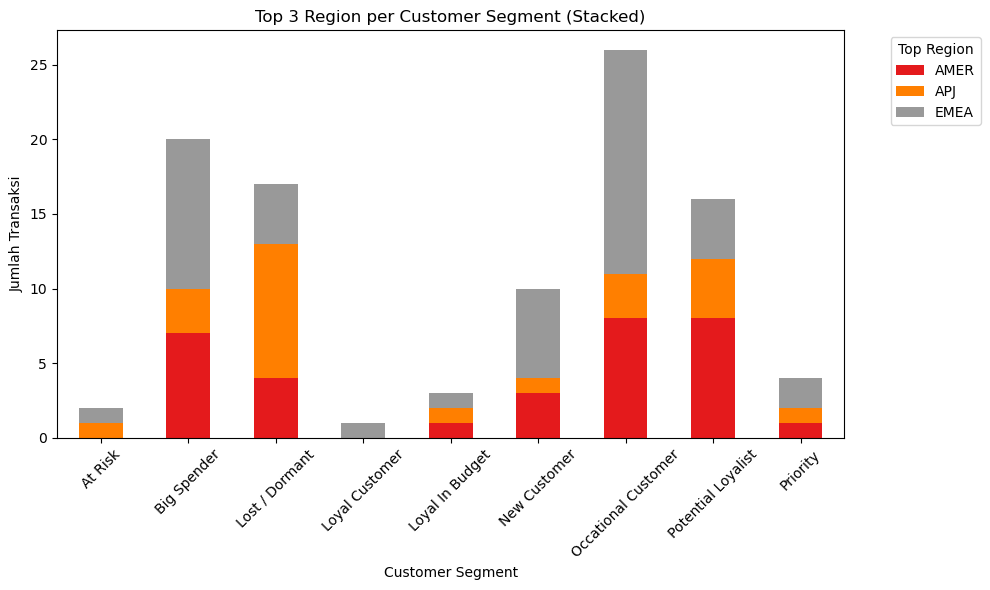

In [191]:
top3_Region = (
    dfcustomer.groupby('Cust_Segment')['Region']
    .apply(lambda x: x.value_counts().head(3))
    .reset_index(name='Count')
    .rename(columns={
          'level_1' : 'Top Region'})
)

pivot_Region = top3_Region.pivot(
    index='Cust_Segment',
    columns='Top Region',
    values='Count'
).fillna(0)

pivot_Region.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set1'
)
plt.title('Top 3 Region per Customer Segment (Stacked)')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.legend(title='Top Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
display(top3_Region)
plt.show()

,Cust_Segment,Monetary,Total Profit
0,At Risk,30663.0,3675.8459
1,Big Spender,766403.0,105990.6979
2,Lost / Dormant,199290.0,24933.5983
3,Loyal Customer,32291.0,4136.3405
4,Loyal In Budget,59129.0,8120.0063
5,New Customer,171711.0,11682.2423
6,Occational Customer,505474.0,66700.4632
7,Potential Loyalist,410087.0,40001.1358
8,Priority,121872.0,21168.7503


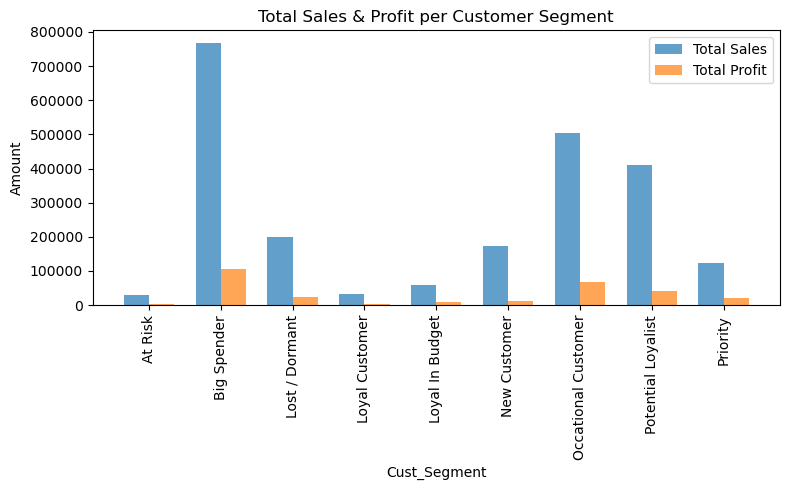

In [192]:
# Hitung total (sum) per segment
df_sum = (
    dfcustomer.groupby('Cust_Segment', as_index=False)[['Monetary', 'Total Profit']]
              .sum()
)
x = np.arange(len(df_sum['Cust_Segment']))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, df_sum['Monetary'], width, label='Total Sales', alpha=0.7)
plt.bar(x + width/2, df_sum['Total Profit'], width, label='Total Profit', alpha=0.7)
plt.title('Total Sales & Profit per Customer Segment')
plt.xlabel('Cust_Segment')
plt.ylabel('Amount')
plt.xticks(x, df_sum['Cust_Segment'], rotation=90)
plt.legend()
plt.tight_layout()


display(df_sum)
plt.show()

In [193]:
Most_Value = pd.merge(
    Nilai_CLV[["Customer", "CLV Score", "CLV Class"]],
    dfcustomer[["Customer","LRFM Score", "Cust_Segment"]],
    on='Customer',
    how='right'
)

Most_Value

,Customer,CLV Score,CLV Class,LRFM Score,Cust_Segment
0,AT&T,4069.0,High Value,12,Potential Loyalist
1,Abbott Laboratories,1694.0,Low Value,6,Lost / Dormant
2,Aetna,3680.0,High Value,11,Potential Loyalist
3,Airbus,4240.0,High Value,12,Big Spender
4,Allianz,5934.0,High Value,15,Big Spender
...,...,...,...,...,...
94,Volkswagen,4935.0,High Value,13,Big Spender
95,Walgreens,2025.0,Low Value,7,Lost / Dormant
96,Walmart,2962.0,Medium Value,8,Occational Customer
97,Walt Disney,3968.0,High Value,9,Potential Loyalist


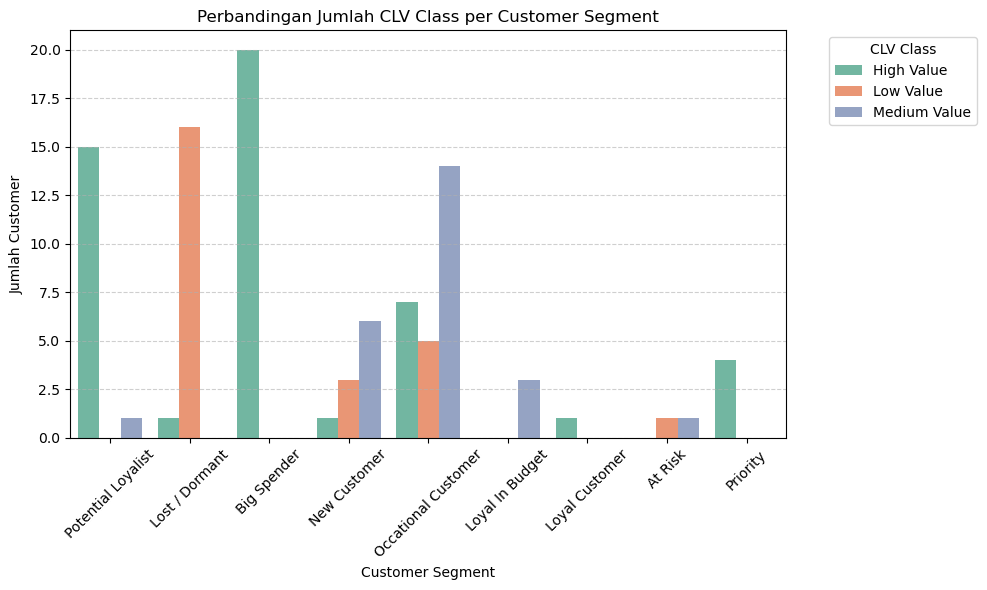

In [194]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=Most_Value,
    x='Cust_Segment',
    hue='CLV Class',
    palette='Set2'
)

plt.title('Perbandingan Jumlah CLV Class per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.legend(title='CLV Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


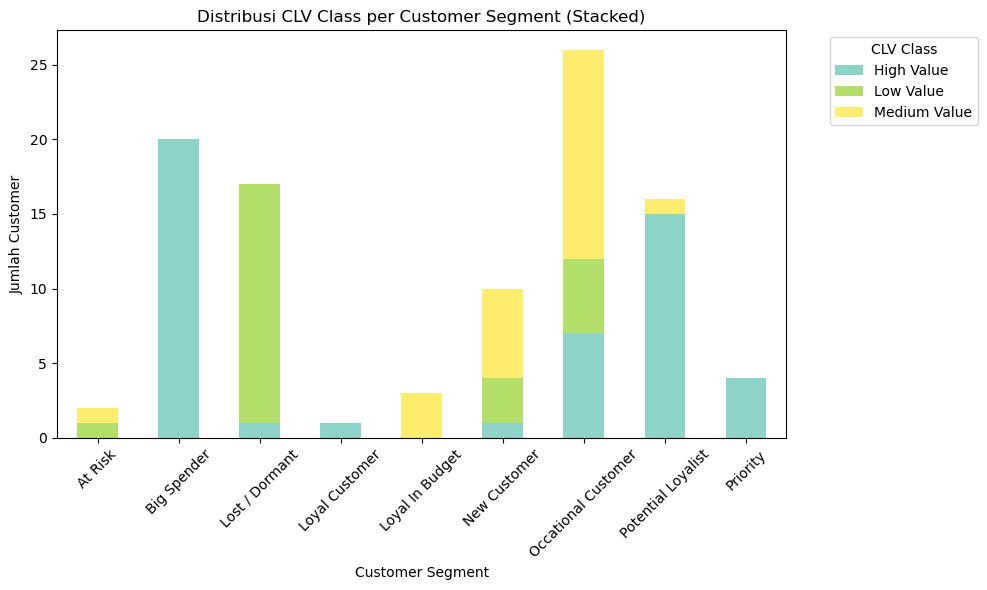

In [195]:
# Hitung jumlah tiap kombinasi CLV Class & Customer Segment
pivot_data = (
    Most_Value
    .groupby(['Cust_Segment', 'CLV Class'])
    .size()
    .unstack(fill_value=0)
)

pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set3'
)

plt.title('Distribusi CLV Class per Customer Segment (Stacked)')
plt.xlabel('Customer Segment')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.legend(title='CLV Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


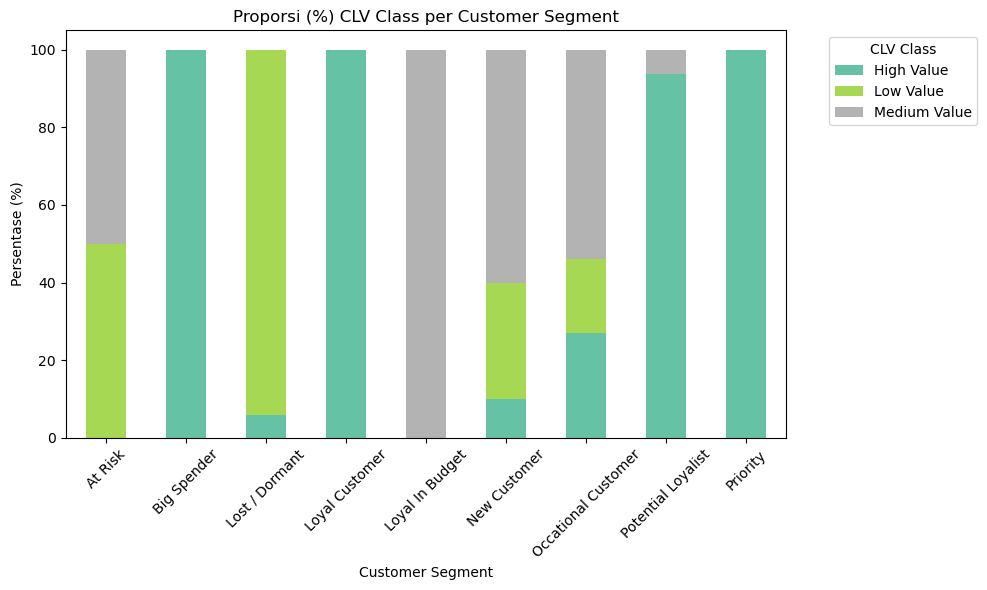

In [196]:
pivot_percent = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set2'
)

plt.title('Proporsi (%) CLV Class per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.legend(title='CLV Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


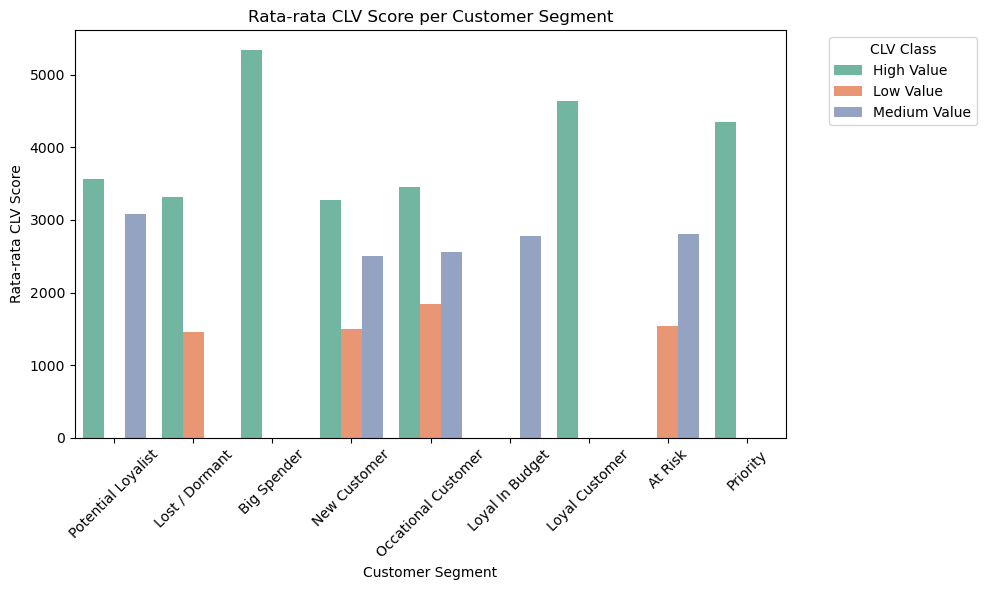

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=Most_Value,
    x='Cust_Segment',
    y='CLV Score',
    hue='CLV Class',
    palette='Set2',
    errorbar= None
)
plt.title('Rata-rata CLV Score per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Rata-rata CLV Score')
plt.xticks(rotation=45)
plt.legend(title='CLV Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **5. Kesimpulan dan Rekomendasi**

### **5.1 Kesimpulan**
#### **5.1.1 Analisis Customer Lifetime Value (CLV)**

Berdasarkan hasil perhitungan CLV, pelanggan dibagi menjadi tiga kategori utama, yaitu High Value (49 pelanggan), Medium Value (25 pelanggan), dan Low Value (25 pelanggan). Distribusi ini menunjukkan bahwa hampir 50% pelanggan memberikan kontribusi ekonomi yang tinggi, sedangkan sisanya masih memiliki potensi untuk ditingkatkan nilainya melalui strategi retensi dan peningkatan transaksi.

Kelompok High Value didominasi oleh pelanggan dengan frekuensi transaksi yang tinggi, nilai pembelian besar, serta hubungan jangka panjang dengan perusahaan. Kelompok ini juga memberikan kontribusi profit paling besar dan menjadi core customer base yang menopang keberlanjutan bisnis.
Sebaliknya, kelompok Low Value cenderung memiliki transaksi dengan nilai pembelian rendah, yang dapat menjadi indikator risiko churn.

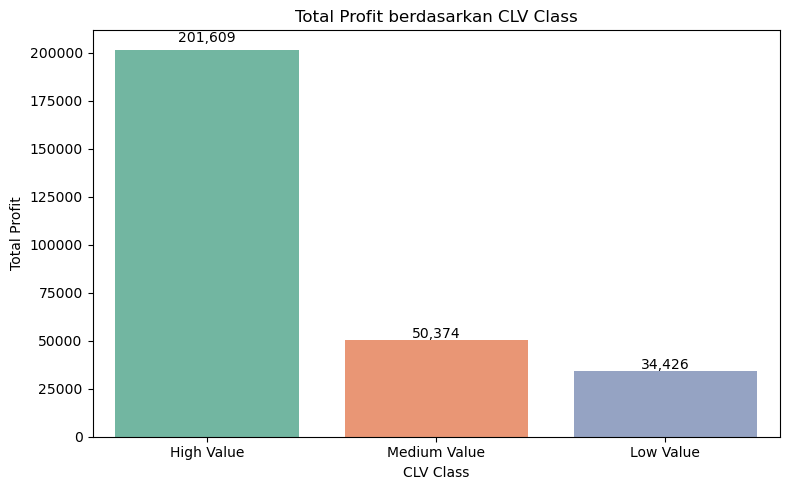

sepuluh pelanggan dengan nilai CLV tertinggi adalah:
| Peringkat | Customer            | CLV Score | CLV Class  | Industry          | Segment    |
| --------- | ------------------- | --------- | ---------- | ----------------- | ---------- |
| 1         | **Anthem**          | 8,024     | High Value | Finance           | Strategic  |
| 2         | **Ford Motor**      | 6,110     | High Value | Transportation    | SMB        |
| 3         | **Allianz**         | 5,934     | High Value | Finance           | SMB        |
| 4         | **Lowes**           | 5,784     | High Value | Retail            | SMB        |
| 5         | **Valero Energy**   | 5,639     | High Value | Energy            | SMB        |
| 6         | **Microsoft**       | 5,532     | High Value | Tech              | Enterprise |
| 7         | **Wells Fargo**     | 5,238     | High Value | Finance           | SMB        |
| 8         | **Coca-Cola**       | 5,165     | High Value | Consumer Products | SMB        |
| 9         | **Trafigura Group** | 5,027     | High Value | Finance           | SMB        |
| 10        | **Siemens**         | 4,920     | High Value | Manufacturing     | Strategic  |

Pelanggan-pelanggan tersebut seluruhnya termasuk dalam kategori High CLV dan berkontribusi secara signifikan terhadap total profit perusahaan. Dominasi industri Finance, Energy, dan Tech menunjukkan bahwa sektor-sektor ini memiliki kecenderungan berinvestasi jangka panjang pada produk SaaS berbasis analitik dan infrastruktur data.

Selain itu, sebagian besar berasal dari segmen SMB, yang menunjukkan bahwa pelanggan skala menengah memiliki nilai ekonomi tinggi dan tingkat loyalitas yang kuat terhadap produk utama perusahaan.

#### **5.1.2 Perbandingan antara Region, Industry, Top Product, dan Business Segment dengan CLV Class**

Analisis lanjutan menunjukkan pola berikut:

High CLV Class:
Didominasi oleh pelanggan dari Region AMER dan EMEA, terutama dalam industri Finance, Tech, dan Energy. Produk dengan kontribusi terbesar berasal dari Alchemy, Data Smasher, dan FinanceHub.
Kelompok ini sebagian besar berasal dari segmen SMB, menandakan bahwa pelanggan skala menengah dengan kebutuhan teknis tinggi memberikan lifetime value tertinggi bagi perusahaan.

Medium CLV Class:
Banyak berasal dari wilayah APAC (Asia Pacific) dan industri Manufacturing atau Retail, dengan produk populer seperti ContactMatcher dan Marketing Suite - Gold. Kelompok ini berpotensi naik kelas jika dilakukan cross-selling atau usage expansion.

Low CLV Class:
Umumnya berasal dari pelanggan di industri Retail, Consumer Products, dan Transportation, dengan aktivitas transaksi rendah dan margin kecil. Produk yang sering muncul di kelas ini adalah Support dan Marketing Suite, menunjukkan bahwa pelanggan masih berada pada tahap awal adopsi layanan.

Keterkaitan ini menegaskan bahwa faktor wilayah, industri, dan jenis produk berpengaruh signifikan terhadap nilai pelanggan (CLV). Dengan demikian, strategi pengelolaan pelanggan perlu disesuaikan dengan karakteristik geografis dan sektor industri.

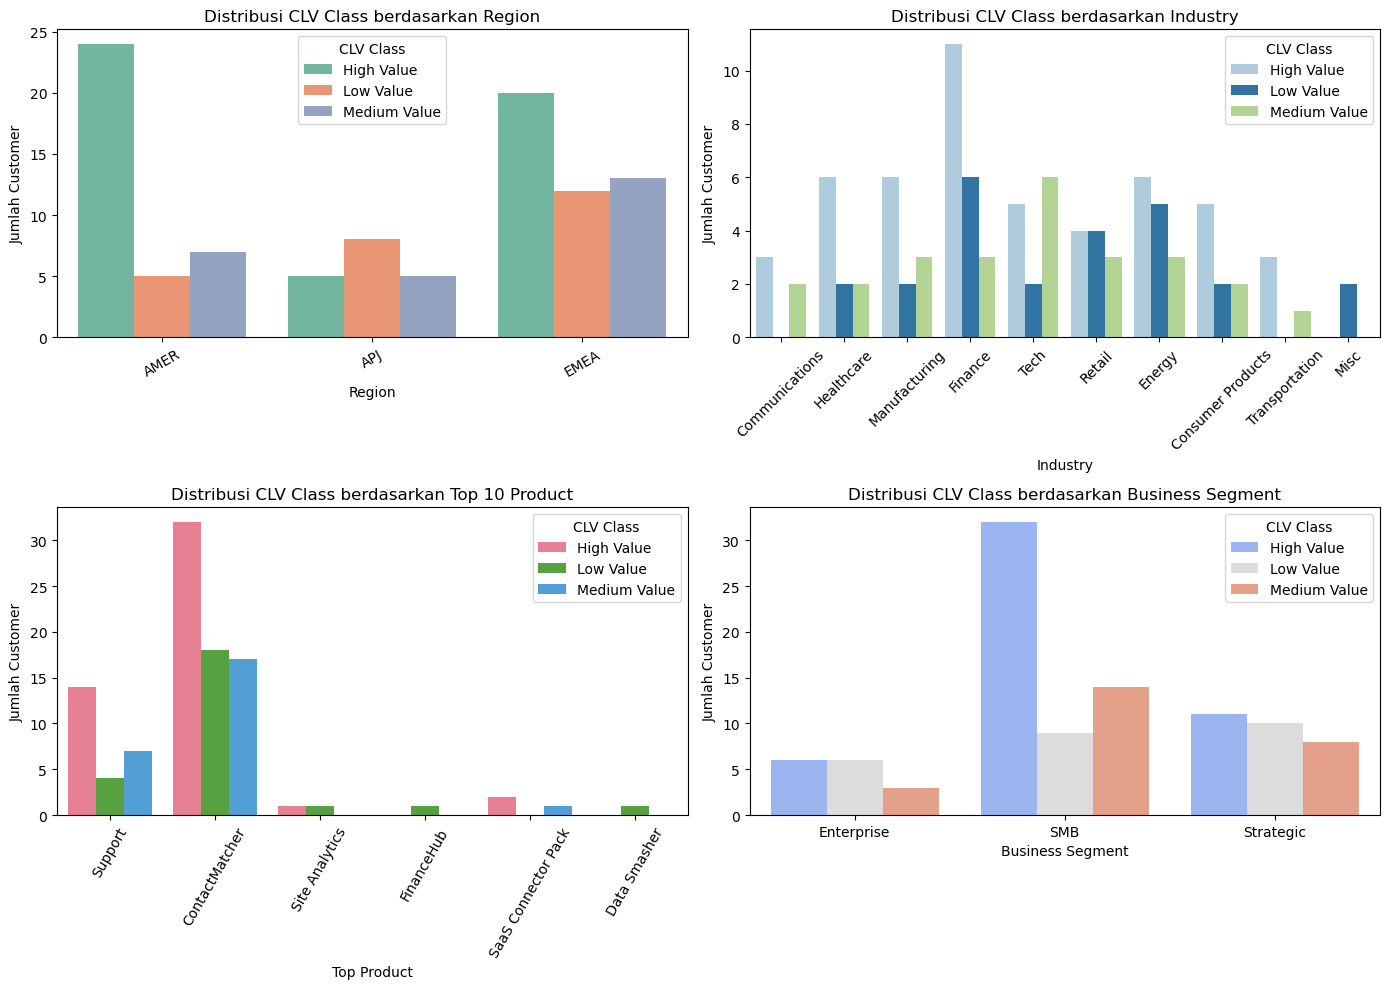

#### **5.1.3 Analisis LRFM Segmentation**

Berdasarkan pendekatan Length, Recency, Frequency, dan Monetary, diperoleh sembilan segmen utama pelanggan:

Segmen LRFM	Karakteristik Utama	Jumlah Customer
| Segmen LRFM         | Karakteristik Utama                                       | Jumlah Customer |
| ------------------- | --------------------------------------------------------- | --------------- |
| Priority Customer   | Sangat aktif, nilai pembelian tinggi, dan durasi panjang  | 4               |
| Loyal Customer      | Frekuensi tinggi, pembelian rutin, nilai transaksi besar  | 1               |
| Big Spender         | Pembelian bernilai besar, namun tidak selalu sering       | 20              |
| Potential Loyalist  | Sering bertransaksi dan menunjukkan potensi menjadi loyal | 16              |
| Loyal in Budget     | Sering bertransaksi namun dengan nominal rendah           | 3               |
| New Customer        | Baru mulai bertransaksi                                   | 10              |
| Occasional Customer | Pembelian tidak rutin atau jarang                         | 26              |
| At Risk             | Pernah aktif namun kini jarang bertransaksi               | 2               |
| Lost/Dormant        | Tidak aktif dalam waktu lama                              | 17              |

Distribusi segmen menunjukkan bahwa sebagian besar pelanggan masih berada di kategori Occasional Customer dan Lost/Dormant, yang artinya peluang untuk memperkuat loyalitas masih terbuka lebar.

Sementara itu, segmen Priority dan Loyal Customer yang berjumlah kecil namun menghasilkan nilai ekonomi tertinggi perlu dijaga secara khusus sebagai aset strategis perusahaan.

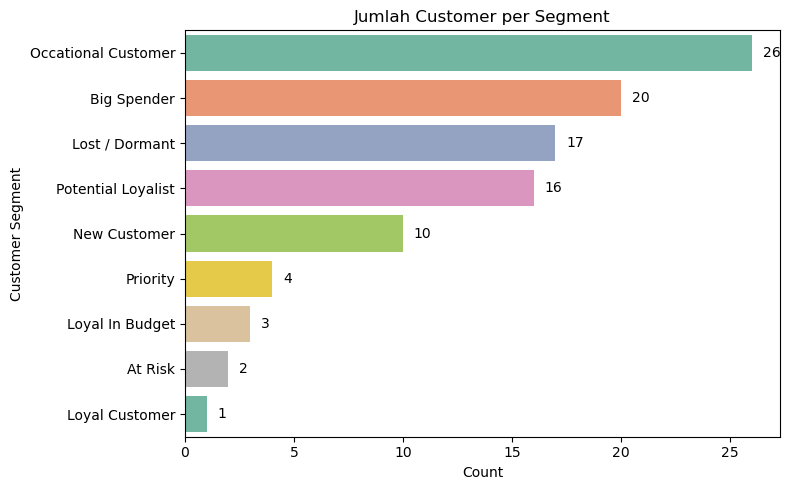


#### **5.1.4 Perbandingan antara Region, Industry, Top Product, dan Business Segment dengan LRFM Segment**

Hasil analisis lintas dimensi menunjukkan beberapa pola menarik:

**Region:**

Pelanggan dari wilayah AMER (Amerika) dan EMEA (Eropa, Timur Tengah, Afrika) mendominasi segmen High LRFM seperti Priority dan Big Spender, dengan frekuensi transaksi lebih tinggi dan nilai pembelian signifikan.

Wilayah APJ (Asia Pacific dan Jepang) menunjukkan banyak pelanggan dalam segmen New Customer dan Potential Loyalist, menandakan pasar yang sedang berkembang dan potensial untuk dikembangkan.

**Industry:**

Industri Finance dan Energy menunjukkan performa terbaik dalam segmen Priority dan Loyal Customer, konsisten dengan perilaku pelanggan B2B yang berorientasi langganan jangka panjang.

Industri Retail dan Manufacturing banyak terdapat pada segmen Occasional dan Lost/Dormant, yang menunjukkan perlunya pendekatan retensi berbasis kebutuhan spesifik industri.

**Top Product:**

Produk seperti Alchemy, Data Smasher, dan Site Analytics paling sering muncul pada pelanggan High LRFM dan High CLV, yang menunjukkan bahwa produk-produk analitik dan infrastruktur data menjadi penopang profitabilitas tertinggi.

Sebaliknya, pelanggan dengan Low LRFM lebih banyak membeli produk entry-level seperti Marketing Suite atau Support, yang dapat digunakan sebagai jalur onboarding pelanggan baru.

**Business Segment (SMB, Strategic, Enterprise):**

Sebagian besar Priority dan Big Spender Customer berasal dari segmen SMB (Small-Medium Business), yang menunjukkan bahwa pasar menengah menjadi pendorong utama revenue.

Segmen Enterprise dan Strategic lebih bervariasi; meskipun memiliki nilai pembelian besar, frekuensi transaksi lebih rendah, sehingga beberapa di antaranya masuk kategori Medium CLV.

#### **5.1.5 Perbandingan antara CLV Class dan LRFM Segment**

Analisis silang antara CLV Class dan LRFM Segment menunjukkan pola yang konsisten dan saling memperkuat:

Segmen Priority, Loyal Customer, dan Big Spender secara dominan berada pada kategori High CLV, yang menegaskan bahwa loyalitas, intensitas transaksi, dan nilai pembelian besar secara langsung meningkatkan lifetime value pelanggan.

Potential Loyalist sebagian besar berada di antara Medium hingga High CLV, yang menunjukkan potensi besar untuk dikembangkan menjadi pelanggan premium melalui pendekatan personalisasi.

Occasional Customer, Lost/Dormant, serta At Risk Customer cenderung berada pada Low CLV, menandakan kontribusi ekonomi rendah dan risiko kehilangan pelanggan tinggi.

Distribusi CLV per LRFM segment dapat disimpulkan sebagai berikut:

- High CLV: terpusat pada Priority, Loyal, dan Big Spender.

- Medium CLV: tersebar di Potential Loyalist dan sebagian Loyal in Budget.

- Low CLV: mendominasi Occasional, At Risk, dan Lost/Dormant Customer.

Korelasi ini membuktikan bahwa model LRFM secara efektif mampu memprediksi nilai ekonomi pelanggan yang kemudian dikonfirmasi melalui pengukuran CLV.

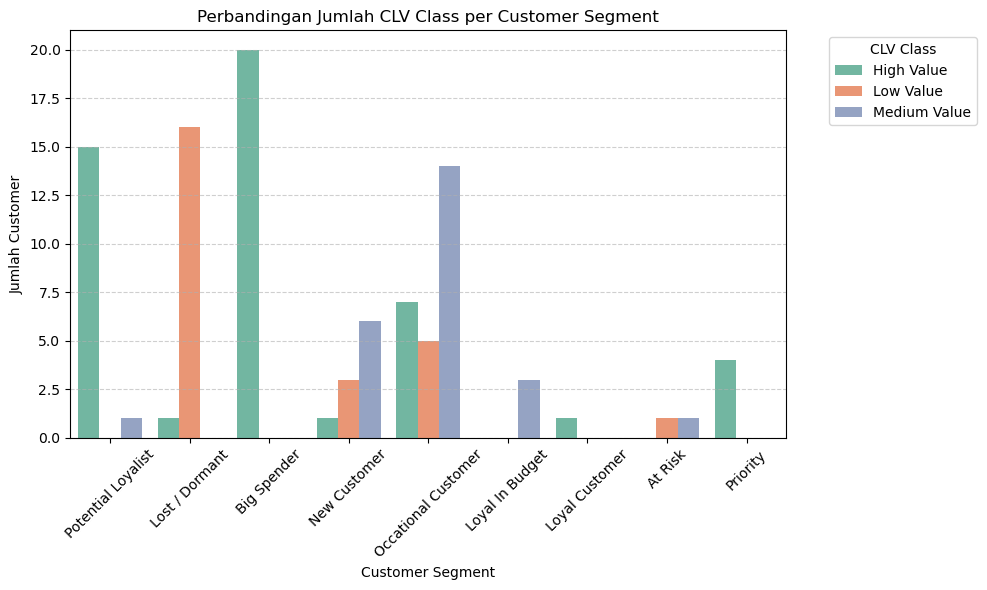

### **5.2 Rekomendasi**


#### **5.2.1 Strategi Berdasarkan Nilai CLV**

**A. Strategi untuk Pelanggan Bernilai Tinggi (High Value)**

- Retensi dan Loyalitas:
Terapkan customer loyalty program seperti diskon eksklusif, layanan prioritas, atau konsultasi teknis premium untuk mempertahankan hubungan jangka panjang.

- Personalisasi Layanan:
Gunakan data historis transaksi untuk memberikan penawaran yang relevan dan meningkatkan customer experience.

- Advocacy Marketing:
Dorong pelanggan bernilai tinggi menjadi brand advocate melalui program referensi pelanggan.

**B. Strategi untuk Pelanggan Bernilai Menengah (Medium Value)**

- Peningkatan Frekuensi Pembelian:
Tawarkan bundle package atau limited-time promotion untuk mendorong pelanggan meningkatkan intensitas transaksi.

- Optimalisasi Engagement:
Gunakan pendekatan komunikasi berbasis data (data-driven engagement) melalui email marketing atau rekomendasi produk otomatis yang relevan.

- Upselling dan Cross-Selling:
Tawarkan produk atau layanan tambahan dengan nilai tambah untuk meningkatkan Customer Lifetime Value.

**C. Strategi untuk Pelanggan Bernilai Rendah (Low Value)**

- Reaktivasi dan Edukasi:
Lakukan kampanye retargeting melalui email, media sosial, atau trial tambahan untuk menghidupkan kembali pelanggan pasif.

- Efisiensi Biaya Akuisisi:
Batasi investasi pemasaran untuk pelanggan dengan potensi rendah, dan arahkan sumber daya ke pelanggan baru yang memiliki profil serupa dengan Potential Loyalist.

- Analisis Penyebab Churn:
Lakukan evaluasi mendalam terhadap alasan rendahnya aktivitas pembelian untuk merancang strategi reaktivasi yang tepat sasaran.


#### **5.2.2 Strategi Berdasarkan Region**

- AMER dan EMEA: Perkuat layanan dukungan dan upselling pada pelanggan yang sudah mapan, terutama di sektor keuangan dan energi.

- APJ: Fokus pada strategi penetrasi pasar baru dan edukasi produk analitik, karena wilayah ini menunjukkan potensi pertumbuhan pelanggan baru dengan CLV sedang.

#### **5.2.3 Strategi Berdasarkan Industry**

- Finance & Tech: Tingkatkan pengembangan produk lanjutan seperti predictive analytics dan cloud optimization service untuk memperpanjang durasi pelanggan dan meningkatkan monetisasi.

- Retail & Manufacturing: Implementasikan usage-based incentive program untuk meningkatkan frekuensi transaksi dan nilai pembelian.

#### **5.2.4 Strategi Berdasarkan Top Product**

- Kembangkan kampanye pemasaran berbasis data untuk Alchemy, Data Smasher, dan Site Analytics sebagai flagship products yang terbukti menghasilkan CLV tinggi.

- Gunakan produk seperti Marketing Suite atau Support sebagai entry-point product untuk menarik pelanggan baru, kemudian dorong konversi menuju produk bernilai tinggi melalui upselling bertahap.

#### **5.2.5 Strategi Berdasarkan Business Segment**

- SMB: Jadikan segmen ini sebagai fokus utama strategi pertumbuhan karena kontribusinya terhadap pelanggan High CLV tertinggi.

- Enterprise: Fokus pada pengembangan solusi custom dan kontrak jangka panjang untuk meningkatkan nilai lifetime.

- Strategic: Gunakan pendekatan account-based marketing untuk mempertahankan pelanggan besar dengan potensi ekspansi lintas produk.

